In [1]:
# For bigger cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
### Hide numerous warnings due to replacaments in data frames
import warnings
warnings.filterwarnings('ignore')

# Sample notebook to process the Benchmark Results 
## SMV Wind Farm Field Data
Data to be downloaded from [the FarmConners Sharepoint](https://share.dtu.dk/sites/FarmConners_316300/Shared%20Documents/Forms/AllItems.aspx?RootFolder=%2Fsites%2FFarmConners%5F316300%2FShared%20Documents%2FBenchmark%5Forganisation%2FParticipantsResults%5FperDataset&FolderCTID=0x012000109CE6CD8151B84BB41C78E145BF9263&View=%7B997984FC%2D2C98%2D446E%2DAD43%2DD535A0120A5B%7D) - accessible to the benchmark organizers only
### *Validation* and *Participants*

In [3]:
import pandas as pd
import numpy as np
from scipy.io import loadmat 

Dataset = 'Submitted_folders'
Dataset_validation = 'validation_data/'

SMV1_loc = [633519, 2539349]
SMV2_loc = [633489, 2539000]
SMV3_loc = [633500, 2538650]
SMV4_loc = [633473, 2538300]
SMV5_loc = [633445, 2537950]
SMV6_loc = [633307, 2537680]
SMV7_loc = [633343, 2537367]
Windcube_loc = [633033, 2537759]

for i in range(1,8):
    i = str(i)
    locals()['SMV'+i+'_loc'][0] = locals()['SMV'+i+'_loc'][0] - 633307 # subtract x_min @ SMV6
    locals()['SMV'+i+'_loc'][1] = locals()['SMV'+i+'_loc'][1] - 2537367 # subtract x_min @ SMV7

# DATA READ
## Field Observations
### Assumption: U == REWS at SMV6
To have the same ref WS with the submitted results

### Issue: Under single_full_wake --> SMV5 and SMV6 does not have an overlapping time step!

In [4]:
import glob # too many files to manually join

### ---------SINGLE FULL WAKE ----------- ###

# --------- Normal Op. -------------#

filename = Dataset_validation+'normal-operation_single-wake.csv'
df_norm_op_SW_observations = pd.read_csv(filename, 
                     header = 0,
                     sep=',',
                     index_col=0,
                     parse_dates=True)

# --------- Wake Steering -------------#

filename = Dataset_validation+'wake-steering_single-wake.csv'
df_steering_SW_observations = pd.read_csv(filename, 
                     header = 0,
                     sep=',',
                     index_col=0,
                     parse_dates=True)
df_baseline_steering_SW_observations = df_steering_SW_observations[df_steering_SW_observations.status=='baseline']
df_steering_SW_observations = df_steering_SW_observations[df_steering_SW_observations.status=='wake_steering']

# --------- Axial Induction -------------#

filename = Dataset_validation+'axial-induction_single-wake.csv'
df_induction_SW_observations = pd.read_csv(filename, 
                     header = 0,
                     sep=',',
                     index_col=0,
                     parse_dates=True)
df_baseline_induction_SW_observations = df_induction_SW_observations[df_induction_SW_observations.status=='baseline']
df_induction_SW_observations = df_induction_SW_observations[df_induction_SW_observations.status=='axial_induction']

### ----------- MULTIPLE FULL WAKE ------------ ###

# --------- Normal Op. -------------#

filename = Dataset_validation+'normal-operation_multiple-wake.csv'
df_norm_op_MW_observations = pd.read_csv(filename, 
                     header = 0,
                     sep=',',
                     index_col=0,
                     parse_dates=True)

# --------- Wake Steering -------------#

filename = Dataset_validation+'wake-steering_multiple-wake.csv'
df_steering_MW_observations = pd.read_csv(filename, 
                     header = 0,
                     sep=',',
                     index_col=0,
                     parse_dates=True)
df_baseline_steering_MW_observations = df_steering_MW_observations[df_steering_MW_observations.status=='baseline']
df_steering_MW_observations = df_steering_MW_observations[df_steering_MW_observations.status=='wake_steering']

df_steering_MW_observations

status  WD_ref  U_ref        P_ref  REWS_ref  \
time                                                                       
2017-08-12 04:20:00  wake_steering   214.7   8.33   878.283678      8.33   
2017-08-12 04:40:00  wake_steering   214.3   8.30   882.659662      8.30   
2017-08-12 04:50:00  wake_steering   214.4   8.09   854.515513      8.09   
2017-08-12 05:00:00  wake_steering   214.6   7.98   933.622199      7.98   
2017-08-12 06:00:00  wake_steering   214.8   8.54   885.221583      8.54   
...                            ...     ...    ...          ...       ...   
2017-10-02 02:10:00  wake_steering   214.9   9.51  1190.797783      9.51   
2017-10-02 02:20:00  wake_steering   213.0   8.97  1104.120423      8.97   
2017-10-02 02:30:00  wake_steering   211.0   8.55   831.556585      8.55   
2017-10-02 02:40:00  wake_steering   210.9   8.28   791.270023      8.28   
2017-10-02 02:50:00  wake_steering   213.7   8.33   854.094791      8.33   

                          P_SMV6  U_SMV6  REWS_SMV6       P_SMV1       P_SMV2  \
time                                                                            
2017-08-12 04:20:00   727.530029    7.56     8.4404   949.770020   901.179993   
2017-08-12 04:40:00   738.340027    7.48     8.3680   928.669983   933.849976   
2017-08-12 04:50:00   722.330017    7.43     8.3130  1059.699951   998.250000   
2017-08-12 05:00:00   676.669983    7.25     8.1150  1115.859985   987.469971   
2017-08-12 06:00:00   889.130005    7.68     8.5412   866.570007   877.039978   
...                          ...     ...        ...          ...          ...   
2017-10-02 02:10:00  1173.569946    9.18     9.8132  1501.530029  1449.709961   
2017-10-02 02:20:00   987.309998    8.49     9.2412  1361.660034  1277.920044   
2017-10-02 02:30:00   880.530029    7.96     8.7764  1033.479980   940.599976   
2017-10-02 02:40:00   814.010010    7.51     8.3984   910.489990   833.150024   
2017-10-02 02:50:00   826.570007    7.65     8.5160   906.760010   844.890015   

                     ...  U_SMV2  U_SMV3  U_SMV4  U_SMV5  avail  REWS_SMV1  \
time                 ...                                                     
2017-08-12 04:20:00  ...    8.44    7.49    7.47    7.83    100     9.0388   
2017-08-12 04:40:00  ...    8.41    7.71    7.31    7.65    100     8.9156   
2017-08-12 04:50:00  ...    8.72    8.03    7.65    7.80    100     9.1972   
2017-08-12 05:00:00  ...    8.68    7.68    7.04    7.60    100     9.3962   
2017-08-12 06:00:00  ...    8.27    7.56    7.87    7.69    100     8.7260   
...                  ...     ...     ...     ...     ...    ...        ...   
2017-10-02 02:10:00  ...    9.86    9.34    9.47    8.86    100    10.5302   
2017-10-02 02:20:00  ...    9.41    8.63    8.97    8.18    100    10.1436   
2017-10-02 02:30:00  ...    8.32    7.77    8.16    7.45    100     9.2500   
2017-10-02 02:40:00  ...    8.07    7.44    8.06    6.97    100     8.8980   
2017-10-02 02:50:00  ...    7.84    7.37    7.60    7.27    100     8.9420   

                     REWS_SMV2  REWS_SMV3  REWS_SMV4  REWS_SMV5  
time                                                             
2017-08-12 04:20:00     9.1972     8.3790     8.3570     8.6672  
2017-08-12 04:40:00     9.1708     8.5664     8.1810     8.5160  
2017-08-12 04:50:00     9.4392     8.8364     8.5160     8.6420  
2017-08-12 05:00:00     9.4048     8.5412     7.8840     8.4740  
2017-08-12 06:00:00     9.0476     8.4404     8.7008     8.5496  
...                        ...        ...        ...        ...  
2017-10-02 02:10:00    10.3308     9.9316    10.0278     9.5596  
2017-10-02 02:20:00     9.9834     9.3618     9.6542     8.9684  
2017-10-02 02:30:00     9.0916     8.6168     8.9508     8.3350  
2017-10-02 02:40:00     8.8716     8.3240     8.8628     7.8010  
2017-10-02 02:50:00     8.6756     8.2470     8.4740     8.1370  

[579 rows x 24 columns]

## Participant P4 

In [5]:
### Single_full wake
participant = '/P4/'

df_norm_op_SW_P4 = pd.read_csv(Dataset+participant+'single_full_wake/normal_operation/output.csv',
                         header = 0,
                         sep=';',
                         index_col=0,
                         parse_dates=True)
df_steering_SW_P4 = pd.read_csv(Dataset+participant+'single_full_wake/wake_steering/output.csv',
                         header = 0,
                         sep=';',
                         index_col=0,
                         parse_dates=True)
df_induction_SW_P4 = pd.read_csv(Dataset+participant+'single_full_wake/axial_induction_control/output.csv',
                         header = 0,
                         sep=';',
                         index_col=0,
                         parse_dates=True)
### Multiple_full wake

df_norm_op_MW_P4 = pd.read_csv(Dataset+participant+'multiple_full_wake/normal_operation/output.csv',
                         header = 0,
                         sep=';',
                         index_col=0,
                         parse_dates=True)
df_steering_MW_P4 = pd.read_csv(Dataset+participant+'multiple_full_wake/wake_steering/output.csv',
                         header = 0,
                         sep=';',
                         index_col=0,
                         parse_dates=True)

# SMV7 is dropped in the multiwake analysis
df_norm_op_MW_P4.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)
df_steering_MW_P4.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)

df_steering_MW_P4


P_SMV1       P_SMV2       P_SMV3       P_SMV4  \
time                                                                      
2017-12-08 04:20:00   759.799896   750.730835   735.288573   717.733780   
2017-12-08 04:40:00   737.883729   729.436728   714.159607   696.140502   
2017-12-08 04:50:00   724.271023   716.091352   700.778239   678.652889   
2017-12-08 05:00:00   676.426853   668.249088   653.437605   635.570323   
2017-12-08 06:00:00   801.177709   789.985708   769.714506   747.094001   
...                          ...          ...          ...          ...   
2017-02-10 02:10:00  1328.058665  1314.086958  1288.930703  1257.578017   
2017-02-10 02:20:00  1080.268374  1068.144240  1045.544190  1011.159537   
2017-02-10 02:30:00   895.265878   886.016702   862.520436   810.972570   
2017-02-10 02:40:00   739.021823   737.253155   714.316062   659.932835   
2017-02-10 02:50:00   787.805070   779.531238   756.659652   719.438959   

                         P_SMV5       P_SMV6  REWS_SMV1  REWS_SMV2  REWS_SMV3  \
time                                                                            
2017-12-08 04:20:00  189.667802   632.520730   8.007171   7.973303   7.912076   
2017-12-08 04:40:00  183.588312   615.292324   7.922366   7.888874   7.828302   
2017-12-08 04:50:00  203.705996   603.142225   7.868393   7.835961   7.775247   
2017-12-08 05:00:00  164.795558   560.175782   7.678696   7.646272   7.587547   
2017-12-08 06:00:00  197.038036   702.151895   8.134217   8.099853   8.037613   
...                         ...          ...        ...        ...        ...   
2017-02-10 02:10:00  405.185399  1143.632347   9.722956   9.681711   9.607449   
2017-02-10 02:20:00  338.329826   916.773246   8.991129   8.953903   8.884513   
2017-02-10 02:30:00  310.094770   764.345393   8.423102   8.394704   8.322562   
2017-02-10 02:40:00  301.666102   642.781969   7.926878   7.919865   7.828923   
2017-02-10 02:50:00  293.096962   663.289311   8.093158   8.067754   7.996810   

                     REWS_SMV4  REWS_SMV5  REWS_SMV6  
time                                                  
2017-12-08 04:20:00   7.842473   5.213825   7.780288  
2017-12-08 04:40:00   7.756859   5.174070   7.697971  
2017-12-08 04:50:00   7.687522   5.305623   7.646562  
2017-12-08 05:00:00   7.516705   5.051180   7.461276  
2017-12-08 06:00:00   7.958883   5.262020   7.903787  
...                        ...        ...        ...  
2017-02-10 02:10:00   9.514895   6.487787   9.447534  
2017-02-10 02:20:00   8.778939   6.145565   8.737451  
2017-02-10 02:30:00   8.164290   6.001035   8.192069  
2017-02-10 02:40:00   7.613299   5.946205   7.729003  
2017-02-10 02:50:00   7.849234   5.890169   7.873031  

[579 rows x 12 columns]

## Participant P5 

In [6]:
### Single_full wake
participant = '/P5/'

df_norm_op_SW_P5 = pd.read_excel(Dataset+participant+'single_full_wake/normal_operation/SMV.xlsx',
                                 header = 0,
                                 index_col=0,
                                 parse_dates=True)

df_steering_SW_P5 = pd.read_excel(Dataset+participant+'single_full_wake/wake_steering/SMV.xlsx',
                                  header = 0,
                                  index_col=0,
                                  parse_dates=True)

### Multiple_full wake

df_norm_op_MW_P5 = pd.read_excel(Dataset+participant+'multiple_full_wake/normal_operation/SMV.xlsx',
                                 header = 0,
                                 index_col=0,
                                 parse_dates=True)

df_steering_MW_P5 = pd.read_excel(Dataset+participant+'multiple_full_wake/wake_steering/SMV.xlsx',
                                  header = 0,
                                  index_col=0,
                                  parse_dates=True) # --> looks too long - time steps should be checked!

### Remove units from the column names
for i in ['MW', 'SW']:
    for j in ['norm_op', 'steering']:
        locals()["df_"+j+"_"+i+"_P5"].columns = locals()["df_"+j+"_"+i+"_P5"].columns.str.replace("\[m/s]", "")
        locals()["df_"+j+"_"+i+"_P5"].columns = locals()["df_"+j+"_"+i+"_P5"].columns.str.replace("\[kW]", "")
        locals()["df_"+j+"_"+i+"_P5"].rename(columns=lambda x: x.strip(), inplace=True)

# SMV7 is dropped in the multiwake analysis
df_norm_op_MW_P5.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)
df_steering_MW_P5.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)
df_steering_MW_P5


P_SMV1  REWS_SMV1  sREWS_SMV1       P_SMV2  \
time                                                                   
2018-03-20 00:20:00   965.230758   8.598253    0.796135   922.082452   
2018-03-20 01:50:00   935.304064   8.505165    0.807308   891.886480   
2018-03-20 03:10:00   918.102232   8.448831    0.864214   875.811031   
2018-03-20 03:40:00   853.757486   8.245169    0.796085   814.470106   
2018-03-20 03:50:00  1010.957572   8.735270    0.909924   966.974002   
...                          ...        ...         ...          ...   
2018-07-11 15:40:00  1545.450481  10.442026    1.080602  1501.519397   
2018-07-11 15:50:00  1309.520274   9.645807    1.079331  1255.365577   
2018-07-11 16:00:00  1110.112822   9.032180    1.043920  1049.360211   
2018-07-11 16:10:00   942.928732   8.520964    1.021154   888.441243   
2018-07-11 16:20:00   999.723473   8.695210    1.091164   952.647585   

                     REWS_SMV2  sREWS_SMV2       P_SMV3  REWS_SMV3  \
time                                                                 
2018-03-20 00:20:00   8.464736    0.783772   911.808139   8.432064   
2018-03-20 01:50:00   8.368726    0.794358   881.615123   8.335448   
2018-03-20 03:10:00   8.314381    0.850462   865.792636   8.281563   
2018-03-20 03:40:00   8.116075    0.783621   805.151110   8.084515   
2018-03-20 03:50:00   8.600753    0.895912   956.459292   8.567802   
...                        ...         ...          ...        ...   
2018-07-11 15:40:00  10.282571    1.064100  1490.629435  10.243470   
2018-07-11 15:50:00   9.475205    1.060241  1242.319059   9.433693   
2018-07-11 16:00:00   8.850340    1.022904  1034.914570   8.805386   
2018-07-11 16:10:00   8.348449    1.000480   875.575173   8.305712   
2018-07-11 16:20:00   8.549105    1.072829   941.525170   8.513544   

                     sREWS_SMV3       P_SMV4  REWS_SMV4  sREWS_SMV4  \
time                                                                  
2018-03-20 00:20:00    0.780747   855.729647   8.253158    0.764181   
2018-03-20 01:50:00    0.791199   825.147307   8.151971    0.773783   
2018-03-20 03:10:00    0.847105   810.782079   8.100916    0.828627   
2018-03-20 03:40:00    0.780574   754.197852   7.911377    0.763857   
2018-03-20 03:50:00    0.892479   899.046480   8.387712    0.873720   
...                         ...          ...        ...         ...   
2018-07-11 15:40:00    1.060054  1428.705205  10.030197    1.037983   
2018-07-11 15:50:00    1.055596  1166.654823   9.201641    1.029630   
2018-07-11 16:00:00    1.017708   953.058055   8.553573    0.988604   
2018-07-11 16:10:00    0.995358   802.956302   8.066511    0.966692   
2018-07-11 16:20:00    1.068366   879.523141   8.315984    1.043574   

                          P_SMV5  REWS_SMV5  sREWS_SMV5       P_SMV6  \
time                                                                   
2018-03-20 00:20:00   616.735613   7.372716    1.159112   742.455658   
2018-03-20 01:50:00   575.165026   7.205429    1.146559   722.818593   
2018-03-20 03:10:00   568.378350   7.174758    1.176304   708.310712   
2018-03-20 03:40:00   537.258386   7.047025    1.127205   653.988590   
2018-03-20 03:50:00   583.000677   7.230372    1.229459   820.091015   
...                          ...        ...         ...          ...   
2018-07-11 15:40:00  1094.161644   8.981842    1.405385  1283.077725   
2018-07-11 15:50:00   724.444905   7.765632    1.324685  1061.344137   
2018-07-11 16:00:00   449.763129   6.642439    1.165718   888.418350   
2018-07-11 16:10:00   368.791379   6.239006    1.118794   751.380042   
2018-07-11 16:20:00   570.724875   7.172662    1.301374   778.351268   

                     REWS_SMV6  sREWS_SMV6  sREWS_SMV7  
time                                                    
2018-03-20 00:20:00   8.038431    0.744299    0.703456  
2018-03-20 01:50:00   7.950797    0.754688    0.713540  
2018-03-20 03:10:00   7.898288    0.807900    0.763780  
2018-03-20 03:40:00   7.708190  

## Participant P6
Second Round of Runs

In [7]:
### --- Single_full wake
participant = '/P6/'

diri = Dataset+participant+'single_full_wake/SecondRound/'
model = '/WakeModel1/'
steering_model = 'EPFL2'
df_norm_op_SW_P6 = pd.read_csv(diri+'1a'+model+'Runs.txt',
                               delimiter='\t',
                               usecols=[x for x in range(0,14)], 
                               skiprows=1,
                               names=['P_SMV'+str(x) for x in range(1,8)] + ['REWS_SMV'+str(x) for x in range(1,8)])
df_norm_op_SW_P6.index = df_norm_op_SW_P5.index


df_steering_SW_P6 = pd.read_csv(diri+'1b'+model+steering_model+'/Runs.csv',
                               delimiter=',',
                               usecols=[x for x in range(0,6)], 
                               skiprows=1,
                               names=['P_SMV'+str(x) for x in range(5,8)] + ['REWS_SMV'+str(x) for x in range(5,8)])
df_steering_SW_P6.index = df_steering_SW_P5.index

df_norm_op_SW_P6.rename(columns={'P_SMV7':'P_ref'}, inplace=True)
df_steering_SW_P6.rename(columns={'P_SMV7':'P_ref'}, inplace=True)

### --- Multiple_full wake

diri = Dataset+participant+'multiple_full_wake/SecondRound/'
df_norm_op_MW_P6 = pd.read_csv(diri+'2a'+model+'Runs.txt',
                               delimiter='\t',
                               usecols=[x for x in range(0,14)], 
                               skiprows=1,
                               names=['P_SMV'+str(x) for x in range(1,8)] + ['REWS_SMV'+str(x) for x in range(1,8)])
df_norm_op_MW_P6.index = df_norm_op_MW_P5.index


df_steering_MW_P6 = pd.read_csv(diri+'2b'+model+steering_model+'/Runs.csv',
                               delimiter=',',
                               usecols=[x for x in range(0,14)], 
                               skiprows=1,
                               names=['P_SMV'+str(x) for x in range(1,8)] + ['REWS_SMV'+str(x) for x in range(1,8)])
df_steering_MW_P6.index = df_steering_MW_P5.index

# SMV7 is dropped in the multiwake analysis
df_norm_op_MW_P6.drop(columns=['P_SMV7', 'REWS_SMV7'], inplace=True)
df_steering_MW_P6.drop(columns=['P_SMV7', 'REWS_SMV7'], inplace=True)
df_steering_MW_P6

P_SMV1     P_SMV2     P_SMV3     P_SMV4     P_SMV5  \
time                                                                         
2018-03-20 00:20:00   920603.0   921874.0   901186.0   901186.0   681695.0   
2018-03-20 01:50:00   895920.0   897072.0   876038.0   876038.0   651219.0   
2018-03-20 03:10:00   879108.0   880279.0   859511.0   859510.0   643569.0   
2018-03-20 03:40:00   817880.0   819077.0   799032.0   799031.0   606385.0   
2018-03-20 03:50:00   954239.0   955550.0   934795.0   934792.0   646172.0   
...                        ...        ...        ...        ...        ...   
2018-07-11 15:40:00  1350000.0  1350000.0  1320000.0  1320000.0  1050000.0   
2018-07-11 15:50:00  1180000.0  1180000.0  1150000.0  1150000.0   811899.0   
2018-07-11 16:00:00  1040000.0  1040000.0  1010000.0  1010000.0   633933.0   
2018-07-11 16:10:00   903703.0   904490.0   878650.0   878446.0   543885.0   
2018-07-11 16:20:00   943601.0   944604.0   922512.0   922503.0   667010.0   

                        P_SMV6  REWS_SMV1  REWS_SMV2  REWS_SMV3  REWS_SMV4  \
time                                                                         
2018-03-20 00:20:00   745685.0       8.48       8.48       8.42       8.42   
2018-03-20 01:50:00   722646.0       8.41       8.41       8.34       8.34   
2018-03-20 03:10:00   711067.0       8.36       8.36       8.30       8.30   
2018-03-20 03:40:00   668554.0       8.17       8.17       8.11       8.11   
2018-03-20 03:50:00   850311.0       8.59       8.60       8.53       8.53   
...                        ...        ...        ...        ...        ...   
2018-07-11 15:40:00  1130000.0       9.79       9.80       9.72       9.72   
2018-07-11 15:50:00   967891.0       9.28       9.29       9.21       9.21   
2018-07-11 16:00:00   838866.0       8.87       8.87       8.79       8.79   
2018-07-11 16:10:00   718481.0       8.45       8.46       8.38       8.38   
2018-07-11 16:20:00   763584.0       8.57       8.58       8.51       8.51   

                     REWS_SMV5  REWS_SMV6  
time                                       
2018-03-20 00:20:00       7.68       8.29  
2018-03-20 01:50:00       7.56       8.21  
2018-03-20 03:10:00       7.53       8.16  
2018-03-20 03:40:00       7.39       7.98  
2018-03-20 03:50:00       7.55       8.40  
...                        ...        ...  
2018-07-11 15:40:00       8.90       9.57  
2018-07-11 15:50:00       8.17       9.05  
2018-07-11 16:00:00       7.52       8.62  
2018-07-11 16:10:00       7.16       8.22  
2018-07-11 16:20:00       7.64       8.37  

[579 rows x 12 columns]

## Participant P16

Each ".csv" file contains the blind test for a test case using the format:
results_{testcase}_{operation Mode}_model_{additional model info}.

In the calibration data, a wind direction offset of approx 3 deg could be observered 
despite of the already corrected data. Therefore, two models are uploaded for each normal
operation test case. Models with annotation wd_0 are using the wind direction measurment directly. 
In cases with wd_3, a bias of 3 deg was added to the measured data. 

For the wake steering test cases, power and wind speed was also computed without yaw misalignment. 
The file is annotated with yaw0.


In [8]:
### Single_full wake
participant = '/P16/'

df_norm_op_SW_P16 = pd.read_csv(Dataset+participant+'single_full_wake/results_single_full_wake_normal_operation_model_wdBias_0.csv',
                         header = 0,
                         sep=',',
                         index_col=0,
                         parse_dates=True)
df_steering_SW_P16 = pd.read_csv(Dataset+participant+'single_full_wake/results_single_full_wake_wake_steering_model_wdBias_0.csv',
                         header = 0,
                         sep=',',
                         index_col=0,
                         parse_dates=True)

# ### Multiple_full wake

df_norm_op_MW_P16 = pd.read_csv(Dataset+participant+'multiple_full_wake/results_multiple_full_wake_normal_operation_model_wdBias_3.csv',
                         header = 0,
                         sep=',',
                         index_col=0,
                         parse_dates=True)

df_steering_MW_P16 = pd.read_csv(Dataset+participant+'multiple_full_wake/results_multiple_full_wake_wake_steering_model_wdBias_3.csv',
                         header = 0,
                         sep=',',
                         index_col=0,
                         parse_dates=True)

# SMV7 is dropped in the multiwake analysis
df_norm_op_MW_P16.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)
df_steering_MW_P16.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)
df_steering_MW_P16

wd  REWS_SMV1       P_SMV1  REWS_SMV2  \
Time                                                                 
2017-08-12 04:20:00  207.529999   7.550729   651.986728   7.559772   
2017-08-12 04:40:00  206.929993   7.467442   630.665214   7.479653   
2017-08-12 04:50:00  205.529999   7.404830   614.636422   7.429065   
2017-08-12 05:00:00  206.619995   7.235681   571.334375   7.249577   
2017-08-12 06:00:00  204.470001   7.639291   674.658589   7.678192   
...                         ...        ...          ...        ...   
2017-10-02 02:10:00  204.500000   9.133773  1141.884115   9.177969   
2017-10-02 02:20:00  201.649994   8.361250   885.851143   8.480570   
2017-10-02 02:30:00  198.990005   7.691230   687.954906   7.931121   
2017-10-02 02:40:00  197.050003   7.104136   537.658926   7.450527   
2017-10-02 02:50:00  199.070007   7.392512   611.483026   7.620580   

                          P_SMV2  REWS_SMV3       P_SMV3  REWS_SMV4  \
Time                                                                  
2017-08-12 04:20:00   654.301705   7.552575   652.459177   7.513243   
2017-08-12 04:40:00   633.791098   7.469701   631.243481   7.413751   
2017-08-12 04:50:00   620.840750   7.409355   615.794793   7.290146   
2017-08-12 05:00:00   574.891673   7.238265   571.995906   7.172568   
2017-08-12 06:00:00   684.617100   7.646410   676.481034   7.489420   
...                          ...        ...          ...        ...   
2017-10-02 02:10:00  1157.043444   9.141218  1144.437892   8.940076   
2017-10-02 02:20:00   925.107664   8.383332   893.116167   7.932828   
2017-10-02 02:30:00   749.367088   7.711238   693.076966   7.032602   
2017-10-02 02:40:00   626.334879   7.079202   531.275610   6.470622   
2017-10-02 02:50:00   669.868425   7.420130   618.553388   6.849276   

                          P_SMV4  REWS_SMV5      P_SMV5  REWS_SMV6  \
Time                                                                 
2017-08-12 04:20:00   642.390220   5.936807  304.205131   7.559924   
2017-08-12 04:40:00   616.920161   5.912479  300.434191   7.479886   
2017-08-12 04:50:00   585.277341   6.014444  316.845416   7.429699   
2017-08-12 05:00:00   555.177408   5.763989  277.418287   7.249862   
2017-08-12 06:00:00   636.291435   6.165054  346.515672   7.679426   
...                          ...        ...         ...        ...   
2017-10-02 02:10:00  1076.285025   7.497075  638.251072   9.179360   
2017-10-02 02:20:00   749.803871   7.187475  558.993662   8.487032   
2017-10-02 02:30:00   519.346219   7.051300  524.132887   7.950382   
2017-10-02 02:40:00   406.712590   6.694715  450.858862   7.489376   
2017-10-02 02:50:00   481.307456   6.677161  447.400628   7.639908   

                          P_SMV6  
Time                              
2017-08-12 04:20:00   612.458348  
2017-08-12 04:40:00   595.357061  
2017-08-12 04:50:00   582.785316  
2017-08-12 05:00:00   538.638368  
2017-08-12 06:00:00   676.855184  
...                          ...  
2017-10-02 02:10:00  1121.349520  
2017-10-02 02:20:00   916.059765  
2017-10-02 02:30:00   731.607564  
2017-10-02 02:40:00   620.647873  
2017-10-02 02:50:00   672.839801  

[579 rows x 13 columns]

## Participant 17

The results are submitted directly wrt to the quantities of interest and binned per wind direction and wind speed. It will be presented for the final plots, together with the other time series

In [9]:
### Single_full wake
participant = '/P17/'

df_norm_op_SW_P17 = pd.read_excel(Dataset+participant+'single_full_wake/single full wake_powerGain.xlsx',
                                  skiprows = 2,
                                  usecols = [0,1,2,3],
                                  names=['WD_bin', 'WS_bin', 'P_SMV5', 'P_SMV6'],
                                  index_col=[0,1])
df_norm_op_SW_P17[['REWS_SMV5', 'REWS_SMV6']] = pd.read_excel(Dataset+participant+'single_full_wake/single full wake_wakeLossReduction.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,2,3],
                                                        index_col=[0,1])
df_norm_op_SW_P17[['TI_SMV5', 'TI_SMV6']] = pd.read_excel(Dataset+participant+'single_full_wake/single full wake_Reduction in wake-addedTI.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,2,3],
                                                        index_col=[0,1])


df_steering_SW_P17 = pd.read_excel(Dataset+participant+'single_full_wake/single full wake_powerGain.xlsx',
                                  skiprows = 2,
                                  usecols = [0,1,4,5],
                                  names=['WD_bin', 'WS_bin', 'P_SMV5', 'P_SMV6'],
                                  index_col=[0,1])
df_steering_SW_P17[['REWS_SMV5', 'REWS_SMV6']] = pd.read_excel(Dataset+participant+'single_full_wake/single full wake_wakeLossReduction.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,4,5],
                                                        index_col=[0,1])
df_steering_SW_P17[['TI_SMV5', 'TI_SMV6']] = pd.read_excel(Dataset+participant+'single_full_wake/single full wake_Reduction in wake-addedTI.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,4,5],
                                                        index_col=[0,1])


### Multiple_full wake

cols=['P_SMV1', 'P_SMV2', 'P_SMV3', 'P_SMV4', 'P_SMV5', 'P_SMV6', 'P_SMV7',
      'REWS_SMV1', 'REWS_SMV2', 'REWS_SMV3', 'REWS_SMV4', 'REWS_SMV5', 'REWS_SMV6', 'REWS_SMV7',
      'TI_SMV1', 'TI_SMV2', 'TI_SMV3', 'TI_SMV4', 'TI_SMV5', 'TI_SMV6', 'TI_SMV7']

df_norm_op_MW_P17 = pd.read_excel(Dataset+participant+'multiple_full_wake/multi full wake_powerGain.xlsx',
                                  skiprows = 2,
                                  usecols = [0,1,2,3,4,5,6,7,8],
                                  names= ['WD_bin', 'WS_bin'] + cols[:7],
                                  index_col=[0,1])
df_norm_op_MW_P17[cols[7:14]] = pd.read_excel(Dataset+participant+'multiple_full_wake/multi full wake_wakeLossReduction.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,2,3,4,5,6,7,8],
                                                        index_col=[0,1])
df_norm_op_MW_P17[cols[14:]] = pd.read_excel(Dataset+participant+'multiple_full_wake/multi full wake_Reduction in wake-addedTI.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,2,3,4,5,6,7,8],
                                                        index_col=[0,1])

df_steering_MW_P17 = pd.read_excel(Dataset+participant+'multiple_full_wake/multi full wake_powerGain.xlsx',
                                  skiprows = 2,
                                  usecols = [0,1,9,10,11,12,13,14,15],
                                  names= ['WD_bin', 'WS_bin'] + cols[:7],
                                  index_col=[0,1])
df_steering_MW_P17[cols[7:14]] = pd.read_excel(Dataset+participant+'multiple_full_wake/multi full wake_wakeLossReduction.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,9,10,11,12,13,14,15],
                                                        index_col=[0,1])
df_steering_MW_P17[cols[14:]] = pd.read_excel(Dataset+participant+'multiple_full_wake/multi full wake_Reduction in wake-addedTI.xlsx',
                                                        skiprows = 2,
                                                        usecols = [0,1,9,10,11,12,13,14,15],
                                                        index_col=[0,1])

# SMV7 is dropped in the multiwake analysis
df_norm_op_MW_P17.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)
df_steering_MW_P17.drop(columns=['P_SMV7','REWS_SMV7'], inplace=True)
df_steering_MW_P17


P_SMV1       P_SMV2       P_SMV3       P_SMV4  \
WD_bin WS_bin                                                       
180    4         12.005357     3.660760    18.560753     7.834457   
       5         40.806780    29.261673    49.289400    61.136048   
       6         94.026978    85.745809   117.527139   135.962812   
       7        175.052300   161.129647   214.597718   244.788504   
       8        286.935571   265.224680   344.819596   387.356891   
...                    ...          ...          ...          ...   
215    11      1695.976696  1696.199375  1696.259121  1696.426377   
       12      1908.759599  1908.939284  1908.987522  1909.123421   
       13      1999.391317  1999.426170  1999.435576  1999.461870   
       14      2040.400178  2040.379515  2040.374037  2040.358280   
       15      2050.000000  2050.000000  2050.000000  2050.000000   

                    P_SMV5       P_SMV6  REWS_SMV1  REWS_SMV2  REWS_SMV3  \
WD_bin WS_bin                                                              
180    4         50.273648    15.549402   3.308711   3.116552   3.449347   
       5        140.428961    84.530151   3.744917   3.616538   3.853726   
       6        280.330240   175.607087   4.383662   4.296572   4.625681   
       7        464.168732   309.864209   5.120854   5.018220   5.402288   
       8        699.291528   476.245506   5.852653   5.735109   6.174043   
...                    ...          ...        ...        ...        ...   
215    11      1521.554245  1649.534656  10.983816  10.984711  10.984951   
       12      1778.628499  1870.380035  11.982345  11.983321  11.983583   
       13      1960.981697  1989.236475  12.980873  12.981931  12.982215   
       14      2032.193561  2041.053899  13.979402  13.980541  13.980846   
       15      2050.000000  2050.000000  14.977931  14.979151  14.979478   

               REWS_SMV4  REWS_SMV5  REWS_SMV6   TI_SMV1   TI_SMV2   TI_SMV3  \
WD_bin WS_bin                                                                  
180    4        3.225055   3.866111   3.443935  0.152267  0.167214  0.153767   
       5        3.992031   4.847738   4.347068  0.196031  0.204960  0.207389   
       6        4.801980   5.818934   5.216866  0.218274  0.210938  0.207559   
       7        5.602340   6.788763   6.086344  0.214882  0.209376  0.206268   
       8        6.402674   7.758586   6.955822  0.214838  0.209376  0.206268   
...                  ...        ...        ...       ...       ...       ...   
215    11      10.985623  10.314450  10.984904  0.110318  0.110301  0.110296   
       12      11.984321  11.350322  11.983532  0.110318  0.110301  0.110296   
       13      12.983015  12.435009  12.982160  0.110318  0.110301  0.110296   
       14      13.981709  13.497554  13.980787  0.110318  0.110301  0.110296   
       15      14.980402  14.553443  14.979415  0.110318  0.110301  0.110296   

                TI_SMV4   TI_SMV5   TI_SMV6   TI_SMV7  
WD_bin WS_bin                                          
180    4       0.190358  0.125199  0.190153  0.110292  
       5       0.196930  0.123100  0.180211  0.110292  
       6       0.195163  0.122977  0.180138  0.110292  
       7       0.195162  0.122977  0.180138  0.110292  
       8       0.195162  0.122977  0.180138  0.110292  
...                 ...       ...       ...       ...  
215    11      0.110283  0.139438  0.110297  0.110299  
       12      0.110283  0.130579  0.110297  0.110299  
       13      0.110283  0.121830  0.110297  0.110299  
       14      0.110283  0.117412  0.110297  0.110299  
       15      0.110283  0.114906  0.110297  0.110299  

[96 rows x 19 columns]

## x-y graph Comparison of the WS predicted vs. observed
- for steered wake, on SMV6 and SMV5

In [10]:
### Define evaluation metrics

def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted

def me(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Error """
    return np.mean(_error(actual, predicted))

def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))

def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))

def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Root Mean Squared Error """
    """ NOTE: not normalized by mean to avoid 0-mean observations """
    return rmse(actual, predicted) / (actual.max() - actual.min())

def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """ Percentage error """
    return _error(actual, predicted) / actual

def mpe(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Percentage Error """
    return np.mean(_percentage_error(actual, predicted))

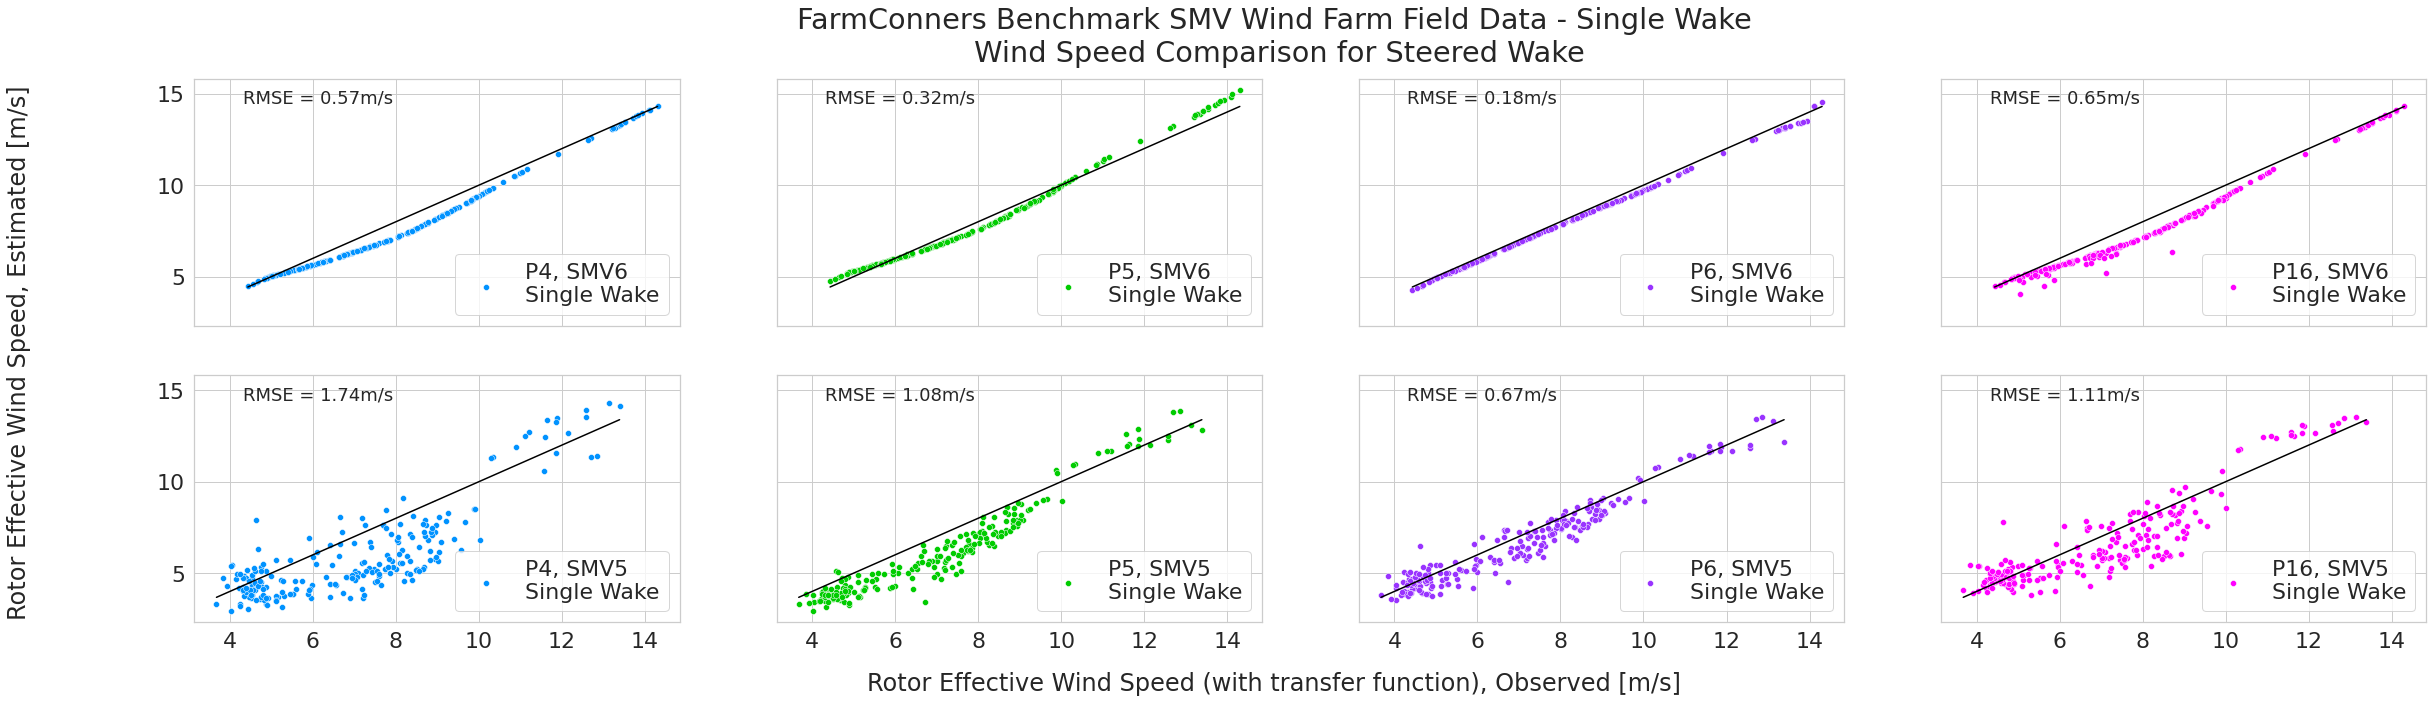

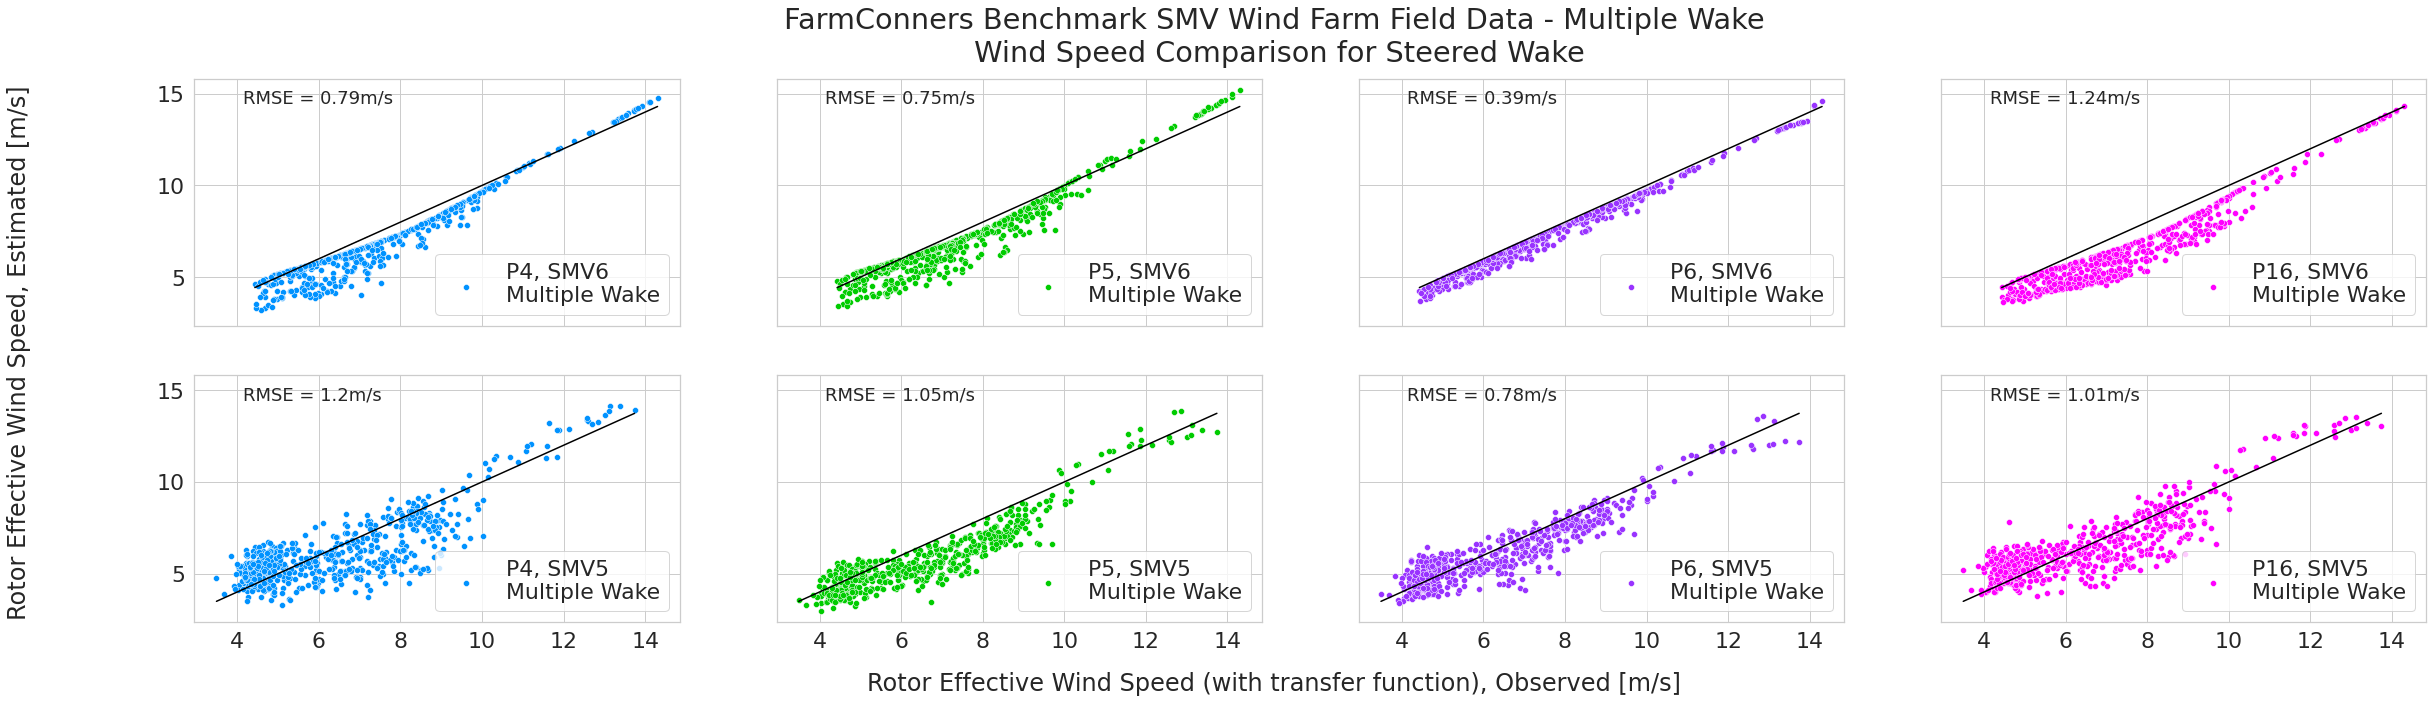

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import decimal

sns.set(style='whitegrid',
        font_scale=2)
colors = ['#0092ff','#00CC00','#9933FF', '#FF00FF', '#FFFF00', '#000000']

# ---- Steered Wake at SMV5-----#
for test_case in ['SW', 'MW']:  # single wake case 'SW' + multiple wake case 'MW'
    fig,ax = plt.subplots(ncols=4, nrows=2, figsize=(40,10),
                        sharex=True, sharey=True,)
    if test_case =='SW':
        titled = 'Single Wake'
    else:
        titled = 'Multiple Wake'
    
# --- Upstream Comparison @ SMV6 ---#
    turb = 'SMV6'
    for i, px in enumerate(['P4', 'P5', 'P6','P16']): # participants for that Dataset
        x = locals()["df_steering_"+test_case+"_observations"]['REWS_SMV6'].values
        y = locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'].values
        y[y<0] = np.nan
        x = x[~np.isnan(y)]
        y = y[~np.isnan(y)]
        yx = x
        sns.lineplot(x=x, y=yx, ax=ax[0][i], color=colors[-1])
        sns.scatterplot(x=x, y=y, ax=ax[0][i], color=colors[i],
                        label=px+', '+turb+'\n'+titled, 
                        legend=False)
        ax[0][i].legend(loc='lower right')
        ax[0][i].set_ylabel('')    
        ax[0][i].set_xlabel('')
        err = round(rmse(x,y),ndigits=2)
        ax[0][i].text(0.1, 0.9, 'RMSE = '+str(err)+'m/s', fontsize=18, transform=ax[0][i].transAxes)
# --- Downstream Comparison @ SMV5 ---#
    turb = 'SMV5'
    for i, px in enumerate(['P4', 'P5', 'P6','P16']): # participants for that Dataset
        x = locals()["df_steering_"+test_case+"_observations"]['REWS_SMV5'].values
        y = locals()["df_steering_"+test_case+"_"+px]['REWS_SMV5'].values
        y[y<0] = np.nan
        x = x[~np.isnan(y)]
        y = y[~np.isnan(y)]
        yx = x
        sns.lineplot(x=x, y=yx, ax=ax[1][i], color=colors[-1])
        sns.scatterplot(x=x, y=y, ax=ax[1][i], color=colors[i], 
                        label=px+', '+turb+'\n'+titled, 
                        legend=False)
        ax[1][i].legend(loc='lower right')
        ax[1][i].set_ylabel('')    
        ax[1][i].set_xlabel('')
        err = round(rmse(x,y),ndigits=2)
        ax[1][i].text(0.1, 0.9, 'RMSE = '+str(err)+'m/s', fontsize=18, transform=ax[1][i].transAxes)
        
    fig.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - '+titled+'\n Wind Speed Comparison for Steered Wake')
    fig.text(0.5, 0.03, 'Rotor Effective Wind Speed (with transfer function), Observed [m/s]', ha='center')
    fig.text(0.06, 0.5, 'Rotor Effective Wind Speed, Estimated [m/s]', va='center', rotation='vertical')
    
    plt.show()
    fig.savefig('SMV_WF_FieldData_Figures/REWS_Scatter_'+test_case+'.png', bbox_inches='tight')



## x-y graph Comparison of the Wake Ratio predicted vs. observed
- for steered wake, on (SMV6-SMV5) / SMV6
- single wake case only

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import decimal

sns.set(style='whitegrid',
        font_scale=2)
colors = ['#0092ff','#00CC00','#9933FF', '#FF00FF', '#FFFF00', '#000000']

test_case = 'SW'
fig,ax = plt.subplots(ncols=4, nrows=1, figsize=(40,10),
                    sharex=True, sharey=True,)

# --- Wind Speed based Wake loss ratio ---#
turb = 'SMV6'
for i, px in enumerate(['P4', 'P5', 'P6','P16']): # participants for that Dataset
    x = ((locals()["df_steering_"+test_case+"_observations"]['REWS_SMV6'].values -
          locals()["df_steering_"+test_case+"_observations"]['REWS_SMV5'].values) /
          locals()["df_steering_"+test_case+"_observations"]['REWS_SMV6'].values)
    y = ((locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'].values -
          locals()["df_steering_"+test_case+"_"+px]['REWS_SMV5'].values) /
          locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'].values)
    y[y<0] = np.nan
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    yx = x
    sns.lineplot(x=x, y=yx, ax=ax[i], color=colors[-1])
    sns.scatterplot(x=x, y=y, ax=ax[i], color=colors[i],
                    label=px+', '+turb+'\n Single Wake', 
                    legend=False)
    ax[i].legend(loc='lower right')
    ax[i].set_ylabel('')    
    ax[i].set_xlabel('')
    err = round(rmse(x,y),ndigits=2)
    ax[i].text(0.1, 0.9, 'RMSE = '+str(err), fontsize=18, transform=ax[i].transAxes)

fig.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - Single Wake'+'\n Wake Ratio Comparison for Steered Wake')
fig.text(0.5, 0.03, 'Observed Rotor Effective Wind Speed '+r'$\frac{SMV6-SMV5}{SMV6}$', ha='center')
fig.text(0.06, 0.5, 'Estimated Rotor Effective Wind Speed \n'+r'$\frac{SMV6-SMV5}{SMV6}$', ha='center', va='center', rotation='vertical')

plt.show()



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import decimal

sns.set(style='whitegrid',
        font_scale=2)
colors = ['#0092ff','#00CC00','#9933FF', '#FF00FF', '#FFFF00', '#000000']

test_case = 'SW'
fig,ax = plt.subplots(ncols=4, nrows=1, figsize=(40,10),
                    sharex=True, sharey=True,)

# --- Wind Speed based Wake loss ratio ---#
turb = 'SMV6'
for i, px in enumerate(['P4', 'P5', 'P6','P16']): # participants for that Dataset
    x = ((locals()["df_steering_"+test_case+"_observations"]['REWS_SMV6'].values -
          locals()["df_steering_"+test_case+"_observations"]['REWS_SMV5'].values) /
          locals()["df_steering_"+test_case+"_observations"]['REWS_SMV6'].values)
    y = ((locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'].values -
          locals()["df_steering_"+test_case+"_"+px]['REWS_SMV5'].values) /
          locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'].values)
    y[y<0] = np.nan
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    yx = x
    sns.lineplot(x=x, y=yx, ax=ax[i], color=colors[-1])
    sns.scatterplot(x=x, y=y, ax=ax[i], color=colors[i],
                    label=px+', '+turb+'\n Single Wake', 
                    legend=False)
    ax[i].legend(loc='lower right')
    ax[i].set_ylabel('')    
    ax[i].set_xlabel('')
    err = round(rmse(x,y),ndigits=2)
    ax[i].text(0.1, 0.9, 'RMSE = '+str(err), fontsize=18, transform=ax[i].transAxes)

fig.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - Single Wake'+'\n Wake Ratio Comparison for Steered Wake')
fig.text(0.5, 0.03, 'Observed Rotor Effective Wind Speed '+r'$\frac{SMV6-SMV5}{SMV6}$', ha='center')
fig.text(0.06, 0.5, 'Estimated Rotor Effective Wind Speed \n'+r'$\frac{SMV6-SMV5}{SMV6}$', ha='center', va='center', rotation='vertical')

plt.show()

## x-y graph Comparison of the Powers predicted vs. observed
- for steered wake
- for normal wake

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import FancyArrow


sns.set(style='whitegrid',
        font_scale=2)
colors = ['#0092ff','#00CC00','#9933FF', '#FF00FF', '#FFFF00', '#000000']

# ---- Steered Wake at SMV5-----#
for test_case in ['SW', 'MW']:  # single wake case 'SW' + multiple wake case 'MW'
    fig,ax = plt.subplots(ncols=4, nrows=2, figsize=(40,10),
                        sharex=True, sharey=True,)
    if test_case =='SW':
        titled = 'Single Wake'
    else:
        titled = 'Multiple Wake'
# --- Upstream Comparison @ SMV6 ---#
    turb = 'SMV6'

    for i, px in enumerate(['P4', 'P5', 'P6','P16']): # participants for that Dataset
        x = locals()["df_steering_"+test_case+"_observations"]['P_SMV6']
        y = locals()["df_steering_"+test_case+"_"+px]['P_SMV6'].values
        y[y<0] = np.nan
        if px == 'P6':
            y = y/10**3
        x = x[~np.isnan(y)]
        y = y[~np.isnan(y)]
        yx = x
        sns.lineplot(x=x, y=yx, ax=ax[0][i], color=colors[-1])
        sns.scatterplot(x=x, y=y, ax=ax[0][i], color=colors[i],
                        label=px+', '+turb+'\n'+titled, 
                        legend=False)
        ax[0][i].legend(loc='lower right')
        ax[0][i].set_ylabel('')    
        ax[0][i].set_xlabel('')
        err = round(rmse(x,y)/np.sqrt(2000),ndigits=1)
        ax[0][i].text(0.1, 0.9, 'NRMSE = '+str(err)+'%', fontsize=18, transform=ax[0][i].transAxes)
# --- Downstream Comparison @ SMV5 ---#
    turb = 'SMV5'       
    for i, px in enumerate(['P4', 'P5', 'P6','P16']): # participants for that Dataset
        x = locals()["df_steering_"+test_case+"_observations"]['P_SMV5']
        y = locals()["df_steering_"+test_case+"_"+px]['P_SMV5'].values
        y[y<0] = np.nan
        if px == 'P6':
            y = y/10**3
        x = x[~np.isnan(y)]
        y = y[~np.isnan(y)]
        yx = x
        sns.lineplot(x=x, y=yx, ax=ax[1][i], color=colors[-1])
        sns.scatterplot(x=x, y=y, ax=ax[1][i], color=colors[i], 
                        label=px+', '+turb+'\n'+titled, 
                        legend=False)
        ax[1][i].legend(loc='lower right')
        ax[1][i].set_ylabel('')    
        ax[1][i].set_xlabel('')
        err = round(rmse(x,y)/np.sqrt(2050),ndigits=1)
        ax[1][i].text(0.1, 0.9, 'NRMSE = '+str(err)+'%', fontsize=18, transform=ax[1][i].transAxes)
    
    
    ### --- Layout snippet on upper right
    newax = fig.add_axes([0.75, 0.92, 0.07, 0.12], anchor='S', zorder=105)

    newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
    ar = FancyArrow(0, 0, 15, 0, width=0.001,
             head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
    m = MarkerStyle("|")
    m._transform.rotate_deg(14)
    newax = plt.scatter(20,0, marker = m, s=3000, color='k')
    plt.text(20, -0.05, 'SMV6', ha = 'left', va='top', fontsize=20)
    newax = plt.scatter(70,0, marker = "|", s=3000, color='k')
    plt.text(70, -0.05, 'SMV5', ha = 'left', va='top', fontsize=20)
    plt.text(-2, -0.035, 'wind \n direction \n =207$^\circ$', color = 'gray', fontsize=15, ha = 'right', va='bottom')
    plt.axis('off')
    plt.gca().add_patch(ar)

    
    fig.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - '+titled+'\n Power Comparison for Steered Wake',
                 y=1.03)
    fig.text(0.5, 0.01, 'Active Power, Observed [kW]', ha='center')
    fig.text(0.08, 0.5, 'Predicted Power [kW]', va='center', rotation='vertical')
    plt.show()
    fig.savefig('SMV_WF_FieldData_Figures/Power_Scatter_'+test_case+'.png', bbox_inches='tight')




# QUANTITIES OF INTEREST
## Power Gain - added weights based on wind speed bins, as defined in [Energy ratio](https://wes.copernicus.org/articles/4/273/2019/)
Accordingly, Binned per WS and WD, using available data 

**Try with 3deg bins also**

In [15]:
### Read all the power signals for norm_op and steering

# WS bin +-0.5 m/s
WS_classes = [x for x in range(4,16,1)]
# Wdir bin +- 2.5deg - boundaries change for single and multiple wake cases

for test_case in ['SW', 'MW']:# single wake case 'SW' + multiple wake case 'MW'
    
    # --- Same Reference power for all participants -- #
    locals()["REF_steering_"+test_case] = locals()["df_steering_"+test_case+"_observations"][['P_ref', 'REWS_ref', 'WD_ref']] 
    locals()["REF_baseline_"+test_case] = locals()["df_baseline_steering_"+test_case+"_observations"][['P_ref', 'REWS_ref', 'WD_ref']] 
    
    
    for px in ['observations','P4', 'P5', 'P6','P16']:  # participants for that Dataset - except of P17 with pre-binned dataset            
    
    # -- Adding a new column for total WF power 'P_WF' per timestep --#
        locals()["df_steering_"+test_case+"_"+px]['P_WF'] = locals()["df_steering_"+test_case+"_"+px].filter(like='P_SMV', axis=1).sum(axis=1)
        
    # Convert P6 power to kW    
        if px == 'P6':
            locals()["df_steering_"+test_case+"_"+px]['P_WF'] = locals()["df_steering_"+test_case+"_"+px]['P_WF']/10**3
  
    # Adding a new column for WD and WS as ref signal in observations / validation data
        locals()["df_steering_"+test_case+"_"+px]['WD_ref'] = locals()["df_steering_"+test_case+"_observations"]['WD_ref'].values
        locals()["df_steering_"+test_case+"_"+px]['REWS_ref'] = locals()["df_steering_"+test_case+"_observations"]['REWS_ref'].values
        locals()["df_norm_op_"+test_case+"_"+px]['WD_ref'] = locals()["df_norm_op_"+test_case+"_observations"]['WD_ref'].values
        locals()["df_norm_op_"+test_case+"_"+px]['REWS_ref'] = locals()["df_norm_op_"+test_case+"_observations"]['REWS_ref'].values
        
        if test_case=='SW':
            wdir_classes = [x for x in range(200,216,5)]
            wd_bins = np.linspace(200-2.5,215+2.5,5)
            
    # Delta_u during steering - calculated only for single wake
            locals()["df_steering_"+test_case+"_"+px]['Delta_u'] = ((locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'] -
                                                                    locals()["df_steering_"+test_case+"_"+px]['REWS_SMV5']) / 
                                                                    locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'])
            locals()["df_norm_op_"+test_case+"_"+px]['Delta_u'] = ((locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV6'] -
                                                                    locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV5']) / 
                                                                    locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV6'])
            locals()["REF_baseline_"+test_case]['Delta_u'] = ((locals()["df_baseline_steering_"+test_case+"_observations"]['REWS_SMV6'] - 
                                                               locals()["df_baseline_steering_"+test_case+"_observations"]['REWS_SMV5']) / 
                                                               locals()["df_baseline_steering_"+test_case+"_observations"]['REWS_SMV6'])
    # -- Adding  new column for 'total' wind speed 'REWS_WF' per timestep --#
            locals()["df_steering_"+test_case+"_"+px]['REWS_WF'] = locals()["df_steering_"+test_case+"_"+px].filter(like='REWS_SMV', axis=1).sum(axis=1) 
    # No wake WF power during steering
            locals()["REF_steering_"+test_case]['P_WF_no_wake'] = 2*locals()["df_steering_"+test_case+"_observations"]['P_ref']  
    # No wake wind speed during steering
            locals()["REF_steering_"+test_case]['REWS_WF_no_wake'] = 2*locals()["df_steering_"+test_case+"_observations"]['REWS_ref']  
    # Normal wake WF power during baseline
            locals()["REF_baseline_"+test_case]['P_WF'] = locals()["df_baseline_steering_"+test_case+"_observations"].filter(like='P_SMV', axis=1).sum(axis=1) 
    # Normal wake wind speed during baseline
            locals()["REF_baseline_"+test_case]['REWS_WF'] = locals()["df_baseline_steering_"+test_case+"_observations"].filter(like='REWS_SMV', axis=1).sum(axis=1) 
    # No wake WF power during baseline
            locals()["REF_baseline_"+test_case]['P_WF_no_wake'] = 2*locals()["df_baseline_steering_"+test_case+"_observations"]['P_ref']
    # No wake wind speed during baseline
            locals()["REF_baseline_"+test_case]['REWS_WF_no_wake'] = 2*locals()["df_baseline_steering_"+test_case+"_observations"]['REWS_ref']
        else:
            wdir_classes = [x for x in range(180,216,5)]
            wd_bins = np.linspace(180-2.5,215+2.5,9)  
            locals()["REF_steering_"+test_case]['P_WF_no_wake'] = 6*locals()["df_steering_"+test_case+"_observations"]['P_ref']   
    # Normal wake WF power during baseline
            locals()["REF_baseline_"+test_case]['P_WF'] = locals()["df_baseline_steering_"+test_case+"_observations"].filter(like='P_SMV', axis=1).sum(axis=1) 
    # No wake WF power during baseline
            locals()["REF_baseline_"+test_case]['P_WF_no_wake'] = 6*locals()["df_baseline_steering_"+test_case+"_observations"]['P_ref']
        
      # Binning the data for WS classes based on REWS_SMV6 or REWS_ref in the validation dataset
        locals()["df_steering_"+test_case+"_"+px]['WS_bin'] = pd.cut(locals()["df_steering_"+test_case+"_"+px]['REWS_ref'],
                                                                     bins=np.linspace(3,15,13),
                                                                     labels=WS_classes)
        locals()["df_norm_op_"+test_case+"_"+px]['WS_bin'] = pd.cut(locals()["df_norm_op_"+test_case+"_"+px]['REWS_ref'],
                                                                     bins=np.linspace(3,15,13),
                                                                     labels=WS_classes)
        locals()["REF_steering_"+test_case]['WS_bin'] = pd.cut(locals()["REF_steering_"+test_case]['REWS_ref'],
                                                                     bins=np.linspace(3,15,13),
                                                                     labels=WS_classes)
        locals()["REF_baseline_"+test_case]['WS_bin'] = pd.cut(locals()["REF_baseline_"+test_case]['REWS_ref'],
                                                                     bins=np.linspace(3,15,13),
                                                                     labels=WS_classes)
        
      # Binning the data for WD classes based on WD_ref in the validation dataset
        locals()["df_steering_"+test_case+"_"+px]['WD_bin'] = pd.cut(locals()["df_steering_"+test_case+"_"+px]['WD_ref'],
                                                                     bins=wd_bins,
                                                                     labels=wdir_classes)
        locals()["df_norm_op_"+test_case+"_"+px]['WD_bin'] = pd.cut(locals()["df_norm_op_"+test_case+"_"+px]['WD_ref'],
                                                                     bins=wd_bins,
                                                                     labels=wdir_classes)
        locals()["REF_steering_"+test_case]['WD_bin'] = pd.cut(locals()["REF_steering_"+test_case]['WD_ref'],
                                                                     bins=wd_bins,
                                                                     labels=wdir_classes)
        locals()["REF_baseline_"+test_case]['WD_bin'] = pd.cut(locals()["REF_baseline_"+test_case]['WD_ref'],
                                                                     bins=wd_bins,
                                                                     labels=wdir_classes)
     # Taking the binned average per WD and per WS
        locals()['Binned_df_steering_'+test_case+'_'+px] = locals()['df_steering_'+test_case+'_'+px].groupby(['WD_bin', 'WS_bin']).agg(['mean', 'std','count'])
        locals()['Binned_df_norm_op_'+test_case+'_'+px] = locals()['df_norm_op_'+test_case+'_'+px].groupby(['WD_bin', 'WS_bin']).agg(['mean', 'std','count'])
        locals()['Binned_df_REF_steering_'+test_case] = locals()['REF_steering_'+test_case].groupby(['WD_bin', 'WS_bin']).agg(['mean', 'std','count'])
        locals()['Binned_df_REF_baseline_'+test_case] = locals()['REF_baseline_'+test_case].groupby(['WD_bin', 'WS_bin']).agg(['mean', 'std','count'])

## Now the Energy Ratios based on binned P_WF of the observation + participants + REF
- Weighted wrt 'count' per WS
- Also should be noted that the std around the energy ratio is calculated using [f=A/B formulation](https://en.wikipedia.org/wiki/Propagation_of_uncertainty), assuming P_WFC and P_norm_op are uncorrelated

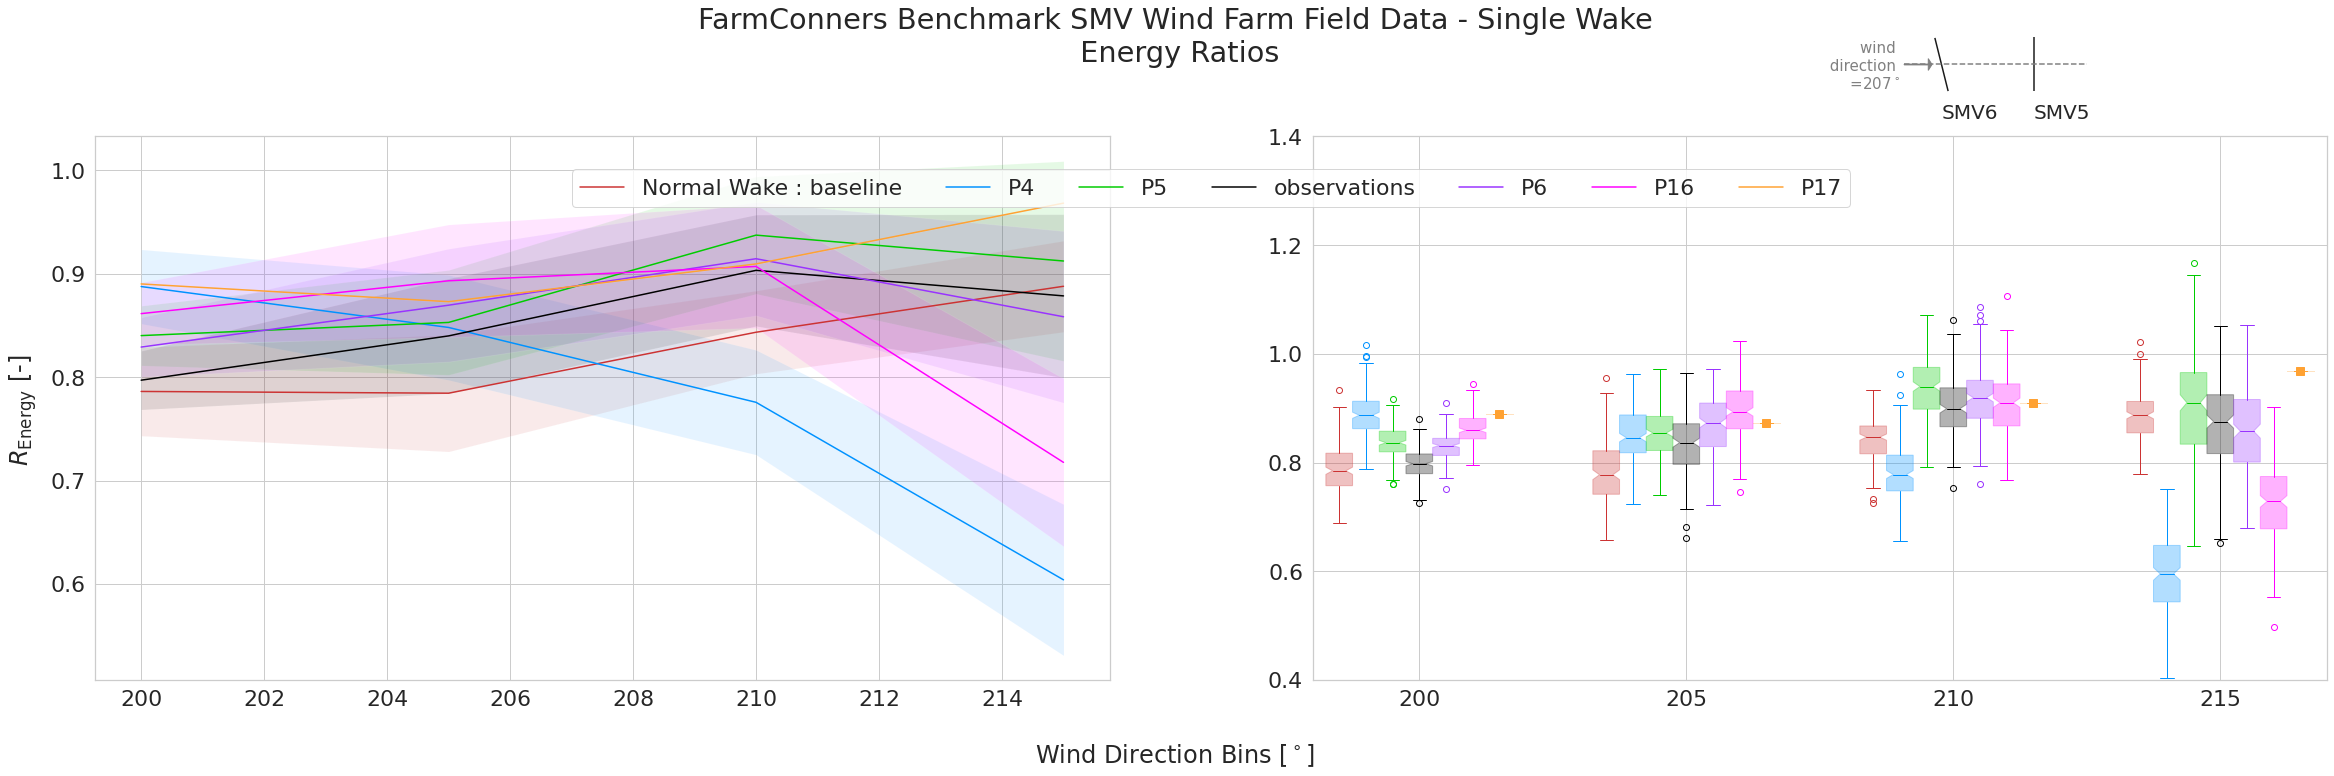

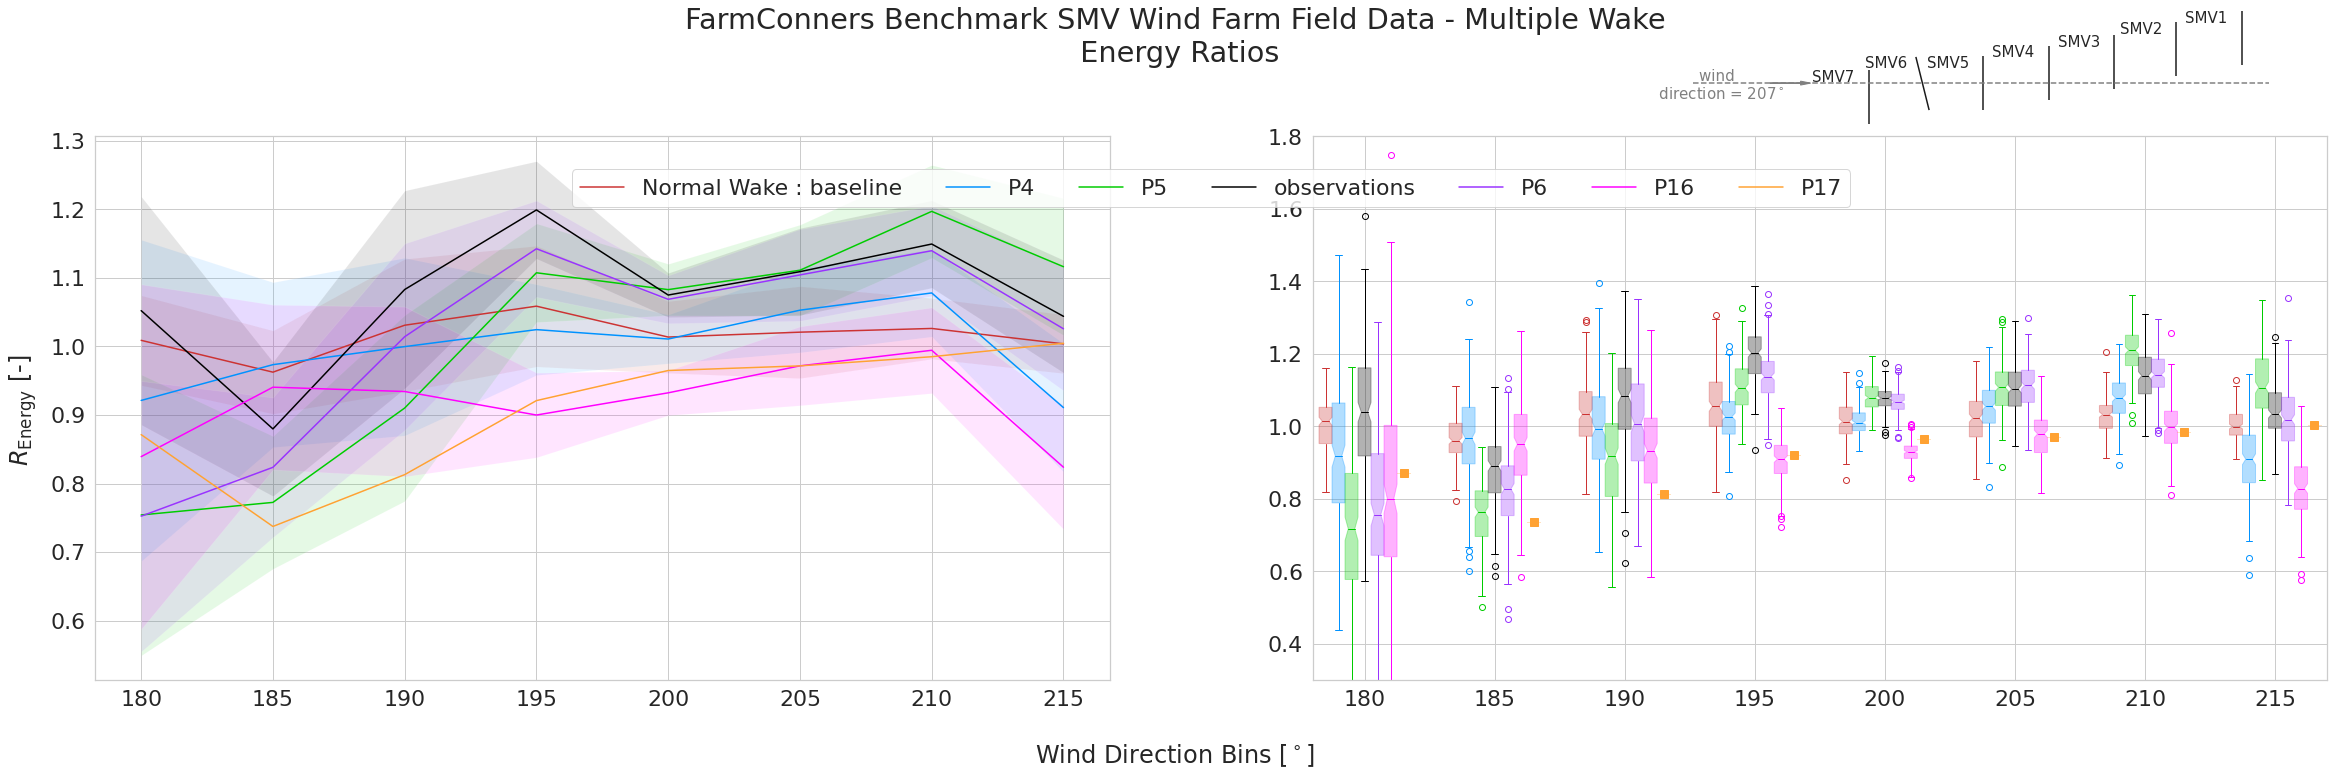

In [16]:
import math

### --- Rotate the layout for better visualization
def rotate_around_point_highperf(xy, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "high performance" version since we're caching some
    values that are needed >1 time. It's less readable than the previous
    function but it's faster.
    """
    x, y = xy
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = math.cos(radians)
    sin_rad = math.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y

    return qx, qy

for test_case in ['SW', 'MW']: # single wake case 'SW' + multiple wake case 'MW'
    for px in ['observations','P4', 'P5', 'P6','P16']:  # participants for that Dataset - except of P17 with pre-binned dataset  
    # ----- WF Power ------ #
        P_WF_participant_steering = locals()['Binned_df_steering_'+test_case+'_'+px]['P_WF']        
        P_WF_gross_wake_steering = locals()['Binned_df_REF_steering_'+test_case]['P_WF_no_wake']
        
    # ---- Weights per WS bin ---- #        
    # -- "the weight is the number of points the other control setting has in this wind speed bin out of the total (number of points or counts)" --#
        count_steering = P_WF_participant_steering.sum(level=1)['count']
        count_ref = P_WF_gross_wake_steering.sum(level=1)['count']
#         weight_steering = count_ref/(count_ref+count_steering)
#         weight_ref = count_steering/(count_ref+count_steering)
    # -- However, density (normalized count) is a more robust approach for significant differences in sample sizes
        density_steering = count_steering/(count_steering.sum())
        density_ref = count_ref/(count_ref.sum())
        weight_steering = density_ref/(density_ref+density_steering)
        weight_ref = density_steering/(density_ref+density_steering)

        
        
    # ----- Steered Wake ------ #    
        nominator_steering = (P_WF_participant_steering['mean']*weight_steering).sum(level=0)
        nominator_steering_std = (P_WF_participant_steering['std']*weight_steering).pow(2).sum(level=0).pow(0.5)
        denominator_steering = (P_WF_gross_wake_steering['mean']*weight_ref).sum(level=0)
        denominator_steering_std = (P_WF_gross_wake_steering['std']*weight_ref).pow(2).sum(level=0).pow(0.5)
        
        locals()["Energy_ratio_steering_"+test_case+"_"+px] = pd.DataFrame(nominator_steering/ denominator_steering, columns=['mean'])
    
        locals()["Energy_ratio_steering_"+test_case+"_"+px]['std'] = (nominator_steering/denominator_steering)* \
                                                                     ((nominator_steering_std/nominator_steering)**2+ \
                                                                      (denominator_steering_std/ denominator_steering)**2)**0.5
    # --- Normal Wake ---- # - same samples, no need to weight
        P_WF_normal_baseline = locals()['Binned_df_REF_baseline_'+test_case]['P_WF']
        P_WF_gross_baseline = locals()['Binned_df_REF_baseline_'+test_case]['P_WF_no_wake']
        nominator_normal = (P_WF_normal_baseline['mean']).sum(level=0)
        nominator_normal_std = (P_WF_normal_baseline['std']).pow(2).sum(level=0).pow(0.5)
        denominator_normal = (P_WF_gross_baseline['mean']).sum(level=0)
        denominator_normal_std = (P_WF_gross_baseline['std']).pow(2).sum(level=0).pow(0.5)
        locals()["Energy_ratio_normal_wake_"+test_case] = pd.DataFrame(nominator_normal/ denominator_normal, columns=['mean'])
    
        locals()["Energy_ratio_normal_wake_"+test_case]['std'] = (nominator_normal/denominator_normal)* \
                                                                     ((nominator_normal_std/nominator_normal)**2+ \
                                                                      (denominator_normal_std/ denominator_normal)**2)**0.5
    
        
    for px in ['P17']: # participant with already binned data - no weights or std is available for that case
        if test_case=='SW':
            P_ref_steering = 2*(locals()["df_steering_"+test_case+"_"+px]['P_SMV6'].groupby('WD_bin').sum()/12)
            P_ref_norm_op = 2*(locals()["df_norm_op_"+test_case+"_"+px]['P_SMV6'].groupby('WD_bin').sum()/12)
        else:
            P_ref_steering = 6*(locals()["df_steering_"+test_case+"_"+px]['P_SMV6'].groupby('WD_bin').sum()/12)
            P_ref_norm_op = 6*(locals()["df_norm_op_"+test_case+"_"+px]['P_SMV6'].groupby('WD_bin').sum()/12)
    # ----- Steered Wake ------ #
        P_WF_participant_steering = locals()["df_steering_"+test_case+"_"+px].filter(like='P', axis=1).sum(axis=1)
        nominator = (P_WF_participant_steering).sum(level=0)/12
        denominator = P_ref_steering
        locals()["Energy_ratio_steering_"+test_case+"_"+px] = pd.DataFrame(nominator/ denominator, columns=['mean'])
        locals()["Energy_ratio_steering_"+test_case+"_"+px]['std'] = 0
        
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid',
        font_scale=2)
colors = ['#CC3333', '#0092ff','#00CC00','#000000','#9933FF', '#FF00FF', '#FFA233']
sns.set_palette(sns.color_palette(colors))

# ------ Plotting ---- #

for test_case in ['SW', 'MW']:  # single wake case 'SW' + multiple wake case 'MW'
    fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
    x = locals()["Energy_ratio_normal_wake_"+test_case].index
# -- line plot -- #
    y_baseline = locals()["Energy_ratio_normal_wake_"+test_case]['mean'].values
    y_baseline_std = locals()["Energy_ratio_normal_wake_"+test_case]['std'].values
    ax[0].plot(x, y_baseline, label = 'Normal Wake : baseline')
    ax[0].fill_between(x, y_baseline + y_baseline_std, 
                       y_baseline - y_baseline_std, alpha = 0.1)
    box = 0
    colr = 0
    for px in ['P4', 'P5', 'observations','P6','P16','P17']: # participants for that Dataset   
        box = box+0.5
        colr = colr+1
        y = locals()['Energy_ratio_steering_'+test_case+'_'+px]['mean'].values
        std = locals()['Energy_ratio_steering_'+test_case+'_'+px]['std'].values
        ax[0].plot(x, y, label=px)
        ax[0].fill_between(x, y + std, y-std, alpha = 0.1)

# -- box plot --#  
        y_dist = np.zeros(shape=(len(x.values),200))
        for i, wd in enumerate(x.values):
            c = colors[colr]
            y_dist[i] = np.random.normal(y[i], std[i], 200)
            ax[1].boxplot(y_dist[i], positions=[wd-1.5+box],
                                  notch=True,
                                  vert=True,
                                  patch_artist=True,
                                  widths = 0.5,
                                  boxprops=dict(facecolor=c, color=c, alpha = 0.3),
                                  capprops=dict(color=c),
                                  whiskerprops=dict(color=c),
                                  flierprops=dict(color=c, markeredgecolor=c),
                                  medianprops=dict(color=c))
            if px == 'P17':
                ax[1].plot(wd-1.5+box, y[i], color=c,  marker='s', markersize=8, linestyle='')
    for i, wd in enumerate(x.values):
        c = colors[0]
        y_dist_baseline =  np.random.normal(y_baseline[i], y_baseline_std[i], 200)
        ax[1].boxplot(y_dist_baseline, positions=[wd-4.5+box],
                                  notch=True,
                                  vert=True,
                                  patch_artist=True,
                                  widths = 0.5,
                                  boxprops=dict(facecolor=c, color=c, alpha = 0.3),
                                  capprops=dict(color=c),
                                  whiskerprops=dict(color=c),
                                  flierprops=dict(color=c, markeredgecolor=c),
                                  medianprops=dict(color=c))
    ax[1].set_xticks(x.values)
    ax[1].xaxis.set_ticklabels(x.values)
    if test_case =='SW':
        titled = 'Single Wake'
        ax[1].set_xlim(198,217)
        ax[1].set_ylim(0.4,1.4)
# --- Add Single Wake Layout
        newax = fig.add_axes([0.75, 0.92, 0.07, 0.12], anchor='S', zorder=105)

        newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
        ar = FancyArrow(0, 0, 15, 0, width=0.001,
                 head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
        m = MarkerStyle("|")
        m._transform.rotate_deg(14)
        newax = plt.scatter(20,0, marker = m, s=3000, color='k')
        plt.text(20, -0.05, 'SMV6', ha = 'left', va='top', fontsize=20)
        newax = plt.scatter(70,0, marker = "|", s=3000, color='k')
        plt.text(70, -0.05, 'SMV5', ha = 'left', va='top', fontsize=20)
        plt.text(-2, -0.035, 'wind \n direction \n =207$^\circ$', color = 'gray', fontsize=15, ha = 'right', va='bottom')
        plt.axis('off')
        plt.gca().add_patch(ar)
        
    else:
        titled = 'Multiple Wake'   
        ax[1].set_xlim(178,217)
        ax[1].set_ylim(0.3,1.8)        
# --- Add Multiple Wake Layout
        newax = fig.add_axes([0.68, 0.92, 0.2, 0.12], anchor='S', zorder=105)

        xy0 = []
        for turb in range(1,8):
            m = MarkerStyle("|")
            d = 0
            if turb == 6: d = d+14 
            turb = str(turb)
            m._transform.rotate_deg(d)
            xy = locals()['SMV'+turb+'_loc']
            xy[0] = xy[0]
            xy[1] = xy[1]
            xy0 = rotate_around_point_highperf(xy, np.deg2rad(270-207), origin=(SMV6_loc[0], SMV6_loc[1]))
            newax = plt.scatter(xy0[0], xy0[1], 
                                marker = m, s=3000, color='k', clip_on=False)
            newax = plt.text(xy0[0]-175, xy0[1]+350, 
                             'SMV'+turb, ha = 'center', va='top', fontsize=15)
            if turb == '6':
                slope = np.tan(np.deg2rad(d-14))
                plt.axline((xy0[0], xy0[1]-10*slope), slope=slope, color='gray', linestyle='--')
                ar = FancyArrow(xy0[0]-750, xy0[1]-50*slope, 200, 25*slope,
                                width=10, head_width=50, head_length=50, length_includes_head=True, fc='gray', ec='gray')
                plt.gca().add_patch(ar) 
                plt.text(-1000, 75, 'wind \n direction = 207$^\circ$', 
                         color = 'gray', fontsize=15, ha = 'center', va='bottom')
        plt.axis('off')
        plt.xlim(-1130, 1720)
        plt.ylim(0, 1100)

    ax[0].set_zorder(100)
    ax[0].legend(loc='lower center', bbox_to_anchor=(1.1, 0.85), ncol = len(ax[0].lines))
    fig.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - '+titled+'\n Energy Ratios', y=1.06)
    fig.text(0.5, 0.01, 'Wind Direction Bins [$^\circ$]', ha='center')
    # fig.text(0.08, 0.5, 'Energy Ratio [-] \n'+r'$ER=\frac{P_{WF}}{P_{ref} \cdot\/turbines\/(gross\/wake)}}$', ha = 'center', va='center', rotation='vertical')
    fig.text(0.10, 0.5, r'$R_{\mathrm{Energy}}$ [-]', ha = 'center', va='center', rotation='vertical')
    fig.savefig('SMV_WF_FieldData_Figures/Energy_Ratio_'+test_case+'.png', bbox_inches='tight')
    plt.show()


## Power Gain - Percentage Change between steered wake and normal wake for energy ratios
- Per WD : Participants (or observations) - baseline during steering
    - (i.e.) all the colours - red in the above plots
- Uncertainty propogated based on [f=A-B](https://en.wikipedia.org/wiki/Propagation_of_uncertainty), assuming Energy ratios are uncorrelated


In [17]:
sns.set(style='whitegrid',
        font_scale=2)
colors = ['#0092ff','#00CC00','#000000','#9933FF', '#FF00FF', '#FFA233']
sns.set_palette(sns.color_palette(colors))

for test_case in ['SW', 'MW']: # single wake case 'SW' + multiple wake case 'MW'
    normal_wake = locals()["Energy_ratio_normal_wake_"+test_case]['mean']
    normal_wake_std = locals()["Energy_ratio_normal_wake_"+test_case]['std']
    fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
    box = 0
    colr = -1
    for px in ['P4', 'P5', 'observations', 'P6','P16', 'P17']:  # participants for that Dataset - including P17 with pre-binned dataset 
        box = box+0.5
        colr = colr+1
        steering_wake = locals()["Energy_ratio_steering_"+test_case+"_"+px]['mean']
        steering_wake_std = locals()["Energy_ratio_steering_"+test_case+"_"+px]['std']
        locals()["Energy_Gain_"+test_case+"_"+px] = pd.DataFrame(steering_wake - normal_wake, columns=['mean'])
        locals()["Energy_Gain_"+test_case+"_"+px]['std'] = (steering_wake_std**2+normal_wake_std**2)**0.5
# -- line plot -- #
        x = locals()["Energy_Gain_"+test_case+"_"+px].index
        y = locals()["Energy_Gain_"+test_case+"_"+px]['mean'].values*100
        std = locals()["Energy_Gain_"+test_case+"_"+px]['std'].values*100
        ax[0].plot(x, y, label=px)
        ax[0].fill_between(x, y + std, y-std, alpha = 0.1)
        
# -- box plot --#
        y_dist = np.zeros(shape=(len(x.values),200))
        c = colors[colr]
        for i, wd in enumerate(x.values):
            y_dist[i] = np.random.normal(y[i], std[i], 200)
            ax[1].boxplot(y_dist[i], positions=[wd-1.5+box],
                                  notch=True,
                                  vert=True,
                                  patch_artist=True,
                                  widths = 0.5,
                                  boxprops=dict(facecolor=c, color=c, alpha = 0.3),
                                  capprops=dict(color=c),
                                  whiskerprops=dict(color=c),
                                  flierprops=dict(color=c, markeredgecolor=c),
                                  medianprops=dict(color=c))
    ax[1].set_xticks(x.values)
    ax[1].xaxis.set_ticklabels(x.values)
    ax[0].plot(x, np.zeros(len(x)), color='gray', linestyle='--')
    if test_case =='SW':
        titled = 'Single Wake'
        ax[1].set_xlim(198,217)
        ax[1].set_ylim(-40,40)
        x = np.linspace(198, 220, 5)
        ax[1].plot(x, np.zeros(len(x)), color='gray', linestyle='--')
# # --- Add Single Wake Layout
        newax = fig.add_axes([0.75, 0.92, 0.07, 0.12], anchor='S', zorder=105)

        newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
        ar = FancyArrow(0, 0, 15, 0, width=0.001,
                 head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
        m = MarkerStyle("|")
        m._transform.rotate_deg(14)
        newax = plt.scatter(20,0, marker = m, s=3000, color='k')
        plt.text(20, -0.05, 'SMV6', ha = 'left', va='top', fontsize=20)
        newax = plt.scatter(70,0, marker = "|", s=3000, color='k')
        plt.text(70, -0.05, 'SMV5', ha = 'left', va='top', fontsize=20)
        plt.text(-2, -0.035, 'wind \n direction \n =207$^\circ$', color = 'gray', fontsize=15, ha = 'right', va='bottom')
        plt.axis('off')
        plt.gca().add_patch(ar)
        
    else:
        titled = 'Multiple Wake'   
        ax[1].set_xlim(178,217)
        ax[1].set_ylim(-50,60)
        x = np.linspace(178, 220, 5)
        ax[1].plot(x, np.zeros(len(x)), color='gray', linestyle='--')
# --- Add Multiple Wake Layout
        newax = fig.add_axes([0.68, 0.92, 0.2, 0.12], anchor='S', zorder=105)

        xy0 = []
        for turb in range(1,8):
            m = MarkerStyle("|")
            d = 0
            if turb == 6: d = d+14 
            turb = str(turb)
            m._transform.rotate_deg(d)
            xy = locals()['SMV'+turb+'_loc']
            xy[0] = xy[0]
            xy[1] = xy[1]
            xy0 = rotate_around_point_highperf(xy, np.deg2rad(270-207), origin=(SMV6_loc[0], SMV6_loc[1]))
            newax = plt.scatter(xy0[0], xy0[1], 
                                marker = m, s=3000, color='k', clip_on=False)
            newax = plt.text(xy0[0]-175, xy0[1]+350, 
                             'SMV'+turb, ha = 'center', va='top', fontsize=15)
            if turb == '6':
                slope = np.tan(np.deg2rad(d-14))
                plt.axline((xy0[0], xy0[1]-10*slope), slope=slope, color='gray', linestyle='--')
                ar = FancyArrow(xy0[0]-750, xy0[1]-50*slope, 200, 25*slope,
                                width=10, head_width=50, head_length=50, length_includes_head=True, fc='gray', ec='gray')
                plt.gca().add_patch(ar) 
                plt.text(-1000, 75, 'wind \n direction = 207$^\circ$', 
                         color = 'gray', fontsize=15, ha = 'center', va='bottom')
        plt.axis('off')
        plt.xlim(-1130, 1720)
        plt.ylim(0, 1100)
        
    ax[0].set_zorder(100)
    ax[0].legend(loc='lower center', bbox_to_anchor=(1.1, 0.88), ncol = len(ax[0].lines))   
    # ax[0].set_ylabel('Power Gain [%] \n$ER_{PID} - ER_{baseline}$')
    ax[0].set_ylabel(r'$P_{\mathrm{GAIN}}$ [%]')
    fig.text(0.5, 0.01, 'Wind Direction Bins [$^\circ$]', ha='center')
    plt.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - '+titled+'\n Power Gain via Wake Steering', y=1.06)
    plt.show()
    fig.savefig('SMV_WF_FieldData_Figures/Power_Gain_'+test_case+'.png', bbox_inches='tight')

 # QUANTITIES OF INTEREST
 ## Wake Loss Reduction
 - Using observed **baseline** for the normal operation wind speeds
 - Weighted average over WS bins, same weights that are used for Energy Ratio based power gain
     - for baseline normal operation
     - for steering
     - for baseline upstream WS as reference (denominator)
     
 3 ways of doing this:
     1.  - Term1 = baseline NWS Delta_u/baseline NWS upstream
         - Term2 = participant steering Delta_u/participant REWS upstream 
&nbsp;      
     2.  - Term1 = baseline REWS Delta_u/baseline REWS upstream
         - Term2 = participant steering Delta_u/participant REWS upstream
&nbsp;      
     2.  - Term1 = participant normal operation REWS Delta_u/participant normal operation REWS upstream
         - Term2 = participant steering Delta_u/participant REWS upstream
         
**Applied only for Single wake test cases** 

**Doesn't seem to make sense still, somewhat...**

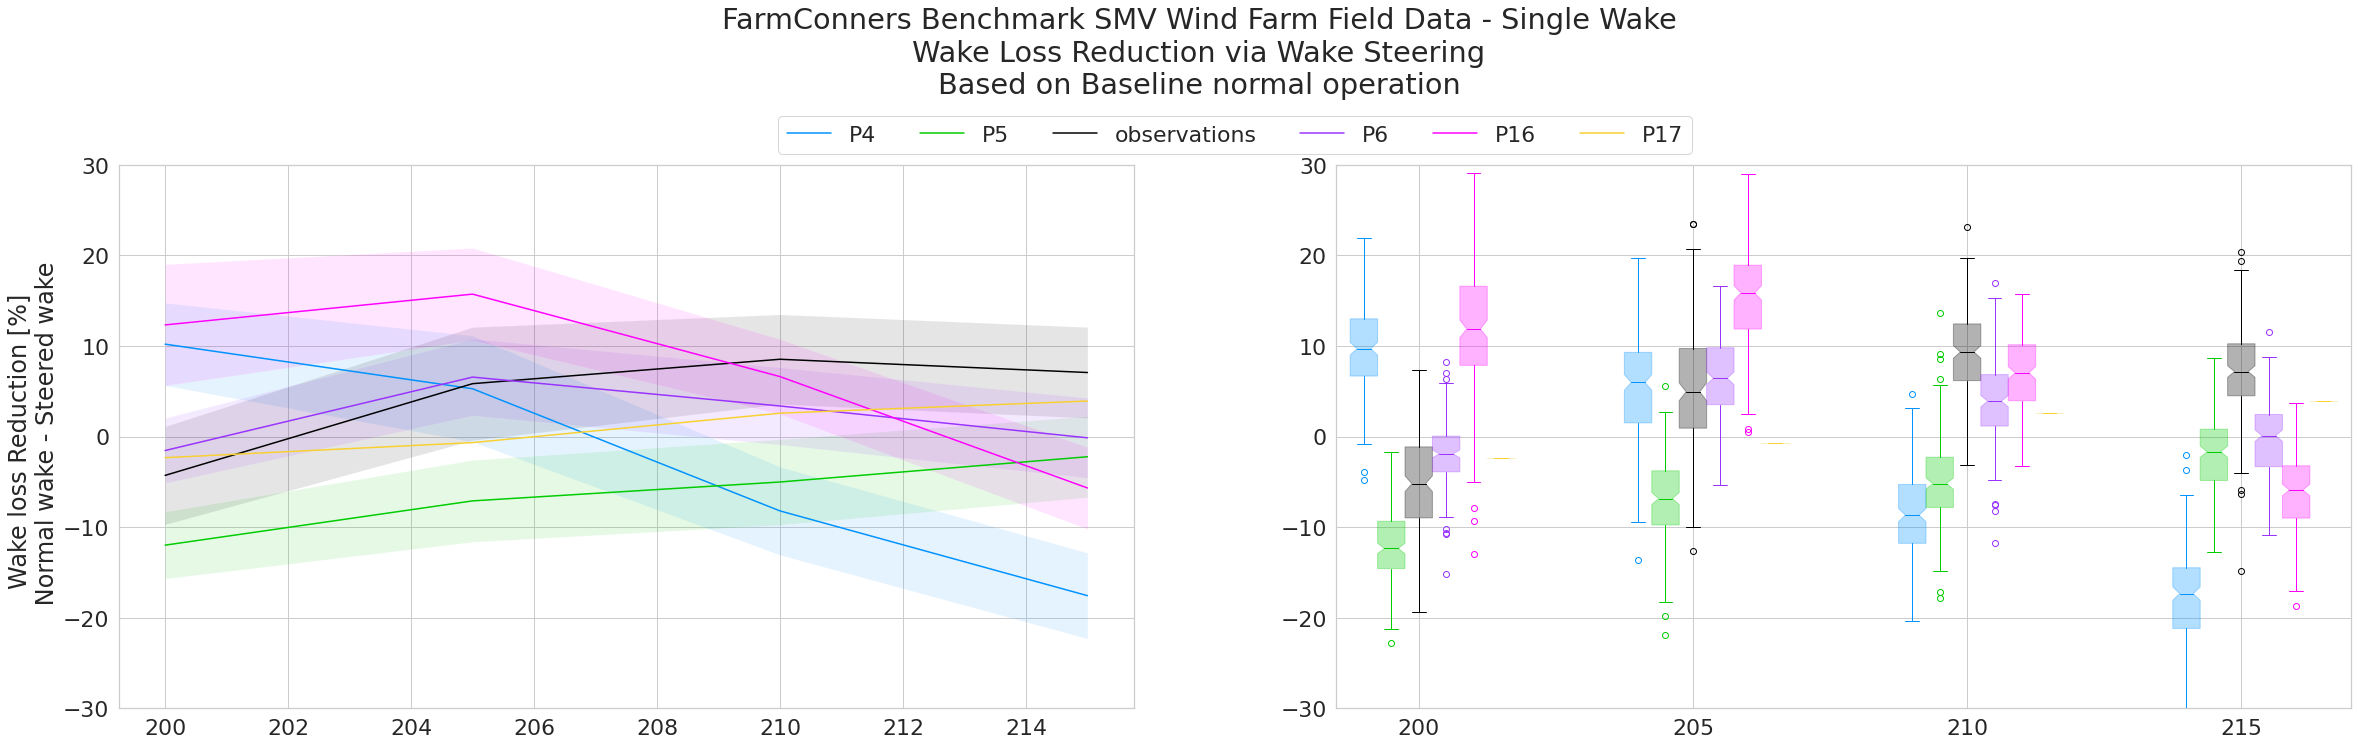

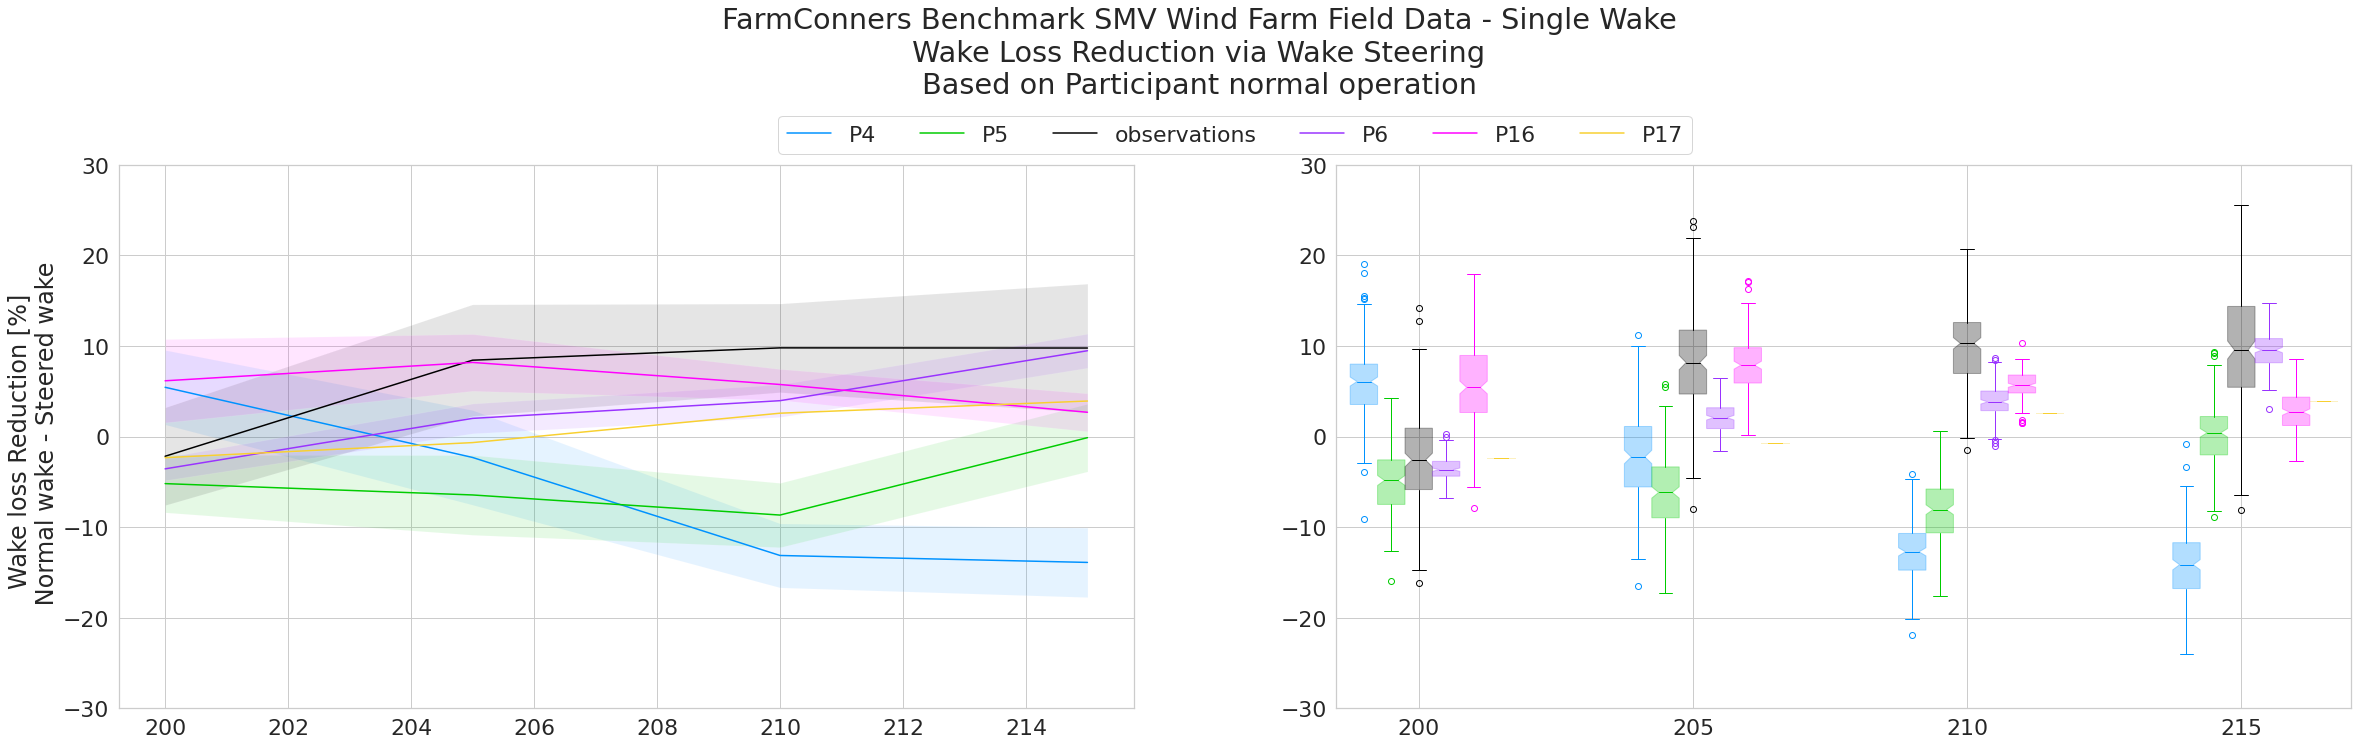

In [18]:
# ----- Approach #2 : Baseline normal operation ------ #

# ---  Single wake case only --- # 
test_case = 'SW'
for px in ['observations','P4', 'P5', 'P6','P16']:  # participants for that Dataset - except of P17 with pre-binned dataset  
    Wake_loss_baseline_normal_op = locals()['Binned_df_REF_baseline_'+test_case]['Delta_u'] 
    Wake_loss_participant_steering = locals()['Binned_df_steering_'+test_case+'_'+px]['Delta_u'] 

# ---- Weighted average over wind speed to evaluate mean wake loss per WD bin --- #
    count_norm_op = Wake_loss_baseline_normal_op['count']
    total_count_norm_op = count_norm_op.sum(level=0)
    weight_steering = count_norm_op / total_count_norm_op
    count_steering = Wake_loss_participant_steering['count']
    total_count_steering = count_steering.sum(level=0)
    weight_norm_op = count_steering / total_count_steering

# ---- Term1 & Term2 ---- # 
    Term1_baseline = (Wake_loss_baseline_normal_op['mean']*weight_norm_op).sum(level=0)
#     Term1_baseline = Wake_loss_baseline_normal_op['mean'].mean(level=0)
    Term1_baseline_std = (Wake_loss_baseline_normal_op['std']*weight_norm_op).pow(2).sum(level=0).pow(0.5)
    
    Term2_steering = (Wake_loss_participant_steering['mean']*weight_steering).sum(level=0)
#     Term2_steering = Wake_loss_participant_steering['mean'].mean(level=0)
    Term2_steering_std = (Wake_loss_participant_steering['std']*weight_steering).pow(2).sum(level=0).pow(0.5)
        
    locals()["Wake_loss_reduction_"+test_case+"_"+px] = pd.DataFrame((Term1_baseline - Term2_steering), columns=['mean'])

    locals()["Wake_loss_reduction_"+test_case+"_"+px]['std'] = (Term1_baseline_std**2+Term2_steering_std**2)**0.5

    for px in ['P17']: # participant with already binned data - no weights or std is available for that case
        Wake_loss_participant_steering = ((locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6']- 
                                           locals()["df_steering_"+test_case+"_"+px]['REWS_SMV5'])/
                                           locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'])
        Wake_loss_baseline_normal_op = ((locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV6']- 
                                         locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV5'])/
                                         locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV6'])

        Term1_baseline = (Wake_loss_baseline_normal_op).sum(level=0)
        Term2_steering = (Wake_loss_participant_steering).sum(level=0)
        locals()["Wake_loss_reduction_"+test_case+"_"+px] = pd.DataFrame((Term1_baseline - Term2_steering), columns=['mean'])
        locals()["Wake_loss_reduction_"+test_case+"_"+px]['std'] = 0
        
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid',
        font_scale=2)
colors = ['#0092ff','#00CC00','#000000','#9933FF', '#FF00FF', '#F8D030']
sns.set_palette(sns.color_palette(colors))

# ------ Plotting ---- #

f,ax = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
box = 0
colr = -1
for px in ['P4', 'P5', 'observations', 'P6','P16','P17']: # participants for that Dataset
    box = box+0.5
    colr = colr+1
    x = locals()['Wake_loss_reduction_'+test_case+'_'+px].index       
    y = locals()['Wake_loss_reduction_'+test_case+'_'+px]['mean'].values*100
    std = locals()['Wake_loss_reduction_'+test_case+'_'+px]['std'].values*100

# -- line plot --#
    ax[0].plot(x, y, label=px)
    ax[0].fill_between(x, y + std, y-std, alpha = 0.1)
# -- box plot --#
    y_dist = np.zeros(shape=(len(x.values),200))
    c = colors[colr]
    for i, wd in enumerate(x.values):
        y_dist[i] = np.random.normal(y[i], std[i], 200)
        bplot = ax[1].boxplot(y_dist[i], positions=[wd-1.5+box],
                              notch=True,
                              vert=True,
                              patch_artist=True,
                              widths = 0.5,
                              boxprops=dict(facecolor=c, color=c, alpha = 0.3),
                              capprops=dict(color=c),
                              whiskerprops=dict(color=c),
                              flierprops=dict(color=c, markeredgecolor=c),
                              medianprops=dict(color=c))
    ax[1].set_xticks(x.values)
    ax[1].xaxis.set_ticklabels(x.values)
ax[0].set_zorder(100)
ax[0].legend(loc='lower center', bbox_to_anchor=(1.1, 1), ncol = len(ax[0].lines))  
ax[0].set_ylim(-30, 30)
ax[1].set_ylim(-30, 30)
ax[0].set_ylabel('Wake loss Reduction [%] \n Normal wake - Steered wake')
plt.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - Single Wake'+'\n Wake Loss Reduction via Wake Steering \n'+
             'Based on Baseline normal operation',
             position = [.5, 1.1] )
plt.show()




# # ----- Approach 3 : Participants normal operation ------ #

test_case = 'SW'
for px in ['observations','P4', 'P5', 'P6','P16']:  # participants for that Dataset - except of P17 with pre-binned dataset  
    Wake_loss_normal_op = locals()['Binned_df_norm_op_'+test_case+'_'+px]['Delta_u'] 
    Wake_loss_participant_steering = locals()['Binned_df_steering_'+test_case+'_'+px]['Delta_u'] 

# ---- Weighted average over wind speed to evaluate mean wake loss per WD bin --- #
    count_norm_op = Wake_loss_normal_op['count']
    total_count_norm_op = count_norm_op.sum(level=0)
    weight_steering = count_norm_op / total_count_norm_op
    count_steering = Wake_loss_participant_steering['count']
    total_count_steering = count_steering.sum(level=0)                                                           
    weight_norm_op = count_steering / total_count_steering

# ---- Term1 & Term2 ---- # 
    Term1_baseline = (Wake_loss_normal_op['mean']*weight_norm_op).sum(level=0)
#     Term1_baseline = Wake_loss_normal_op['mean'].mean(level=0) 
    Term1_baseline_std = (Wake_loss_normal_op['std']*weight_norm_op).pow(2).sum(level=0).pow(0.5)
    
    Term2_steering = (Wake_loss_participant_steering['mean']*weight_steering).sum(level=0)
#     Term2_steering = Wake_loss_participant_steering['mean'].mean(level=0)
    Term2_steering_std = (Wake_loss_participant_steering['std']*weight_steering).pow(2).sum(level=0).pow(0.5)
        
    locals()["Wake_loss_reduction_"+test_case+"_"+px] = pd.DataFrame((Term1_baseline - Term2_steering), columns=['mean'])

    locals()["Wake_loss_reduction_"+test_case+"_"+px]['std'] = (Term1_baseline_std**2+Term2_steering_std**2)**0.5

    for px in ['P17']: # participant with already binned data - no weights or std is available for that case
        Wake_loss_participant_steering = ((locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6']- 
                                           locals()["df_steering_"+test_case+"_"+px]['REWS_SMV5'])/
                                           locals()["df_steering_"+test_case+"_"+px]['REWS_SMV6'])
        Wake_loss_baseline_normal_op = ((locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV6']- 
                                         locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV5'])/
                                         locals()["df_norm_op_"+test_case+"_"+px]['REWS_SMV6'])

        Term1_baseline = (Wake_loss_baseline_normal_op).sum(level=0)
        Term2_steering = (Wake_loss_participant_steering).sum(level=0)
        locals()["Wake_loss_reduction_"+test_case+"_"+px] = pd.DataFrame((Term1_baseline - Term2_steering), columns=['mean'])
        locals()["Wake_loss_reduction_"+test_case+"_"+px]['std'] = 0
        

# ------ Plotting ---- #

f,ax = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
box = 0
colr = -1
for px in ['P4', 'P5', 'observations', 'P6','P16','P17']: # participants for that Dataset
    box = box+0.5
    colr = colr+1
    x = locals()['Wake_loss_reduction_'+test_case+'_'+px].index       
    y = locals()['Wake_loss_reduction_'+test_case+'_'+px]['mean'].values*100
    std = locals()['Wake_loss_reduction_'+test_case+'_'+px]['std'].values*100

# -- line plot --#
    ax[0].plot(x, y, label=px)
    ax[0].fill_between(x, y + std, y-std, alpha = 0.1)
# -- box plot --#
    y_dist = np.zeros(shape=(len(x.values),200))
    c = colors[colr]
    for i, wd in enumerate(x.values):
        y_dist[i] = np.random.normal(y[i], std[i], 200)
        bplot = ax[1].boxplot(y_dist[i], positions=[wd-1.5+box],
                              notch=True,
                              vert=True,
                              patch_artist=True,
                              widths = 0.5,
                              boxprops=dict(facecolor=c, color=c, alpha = 0.3),
                              capprops=dict(color=c),
                              whiskerprops=dict(color=c),
                              flierprops=dict(color=c, markeredgecolor=c),
                              medianprops=dict(color=c))
    ax[1].set_xticks(x.values)
    ax[1].xaxis.set_ticklabels(x.values)
ax[0].set_zorder(100)
ax[0].legend(loc='lower center', bbox_to_anchor=(1.1, 1), ncol = len(ax[0].lines))  
ax[0].set_ylim(-30, 30)
ax[1].set_ylim(-30, 30)
ax[0].set_ylabel('Wake loss Reduction [%] \n Normal wake - Steered wake')
plt.suptitle('FarmConners Benchmark SMV Wind Farm Field Data - Single Wake'+'\n Wake Loss Reduction via Wake Steering \n'+
             'Based on Participant normal operation',
             position = [.5, 1.1] )
plt.show()



